# **New York City Yellow Taxi Data**
**Name:** Rita Kumari

**Assignment Title:** EDA_Optimising_NYC_Taxis_RitaKumari

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file
from google.colab import drive
drive.mount('/content/drive')
df_1 = pd.read_parquet('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df_1.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import os
from glob import glob

# Select the folder having data files
os.chdir('/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

data_path = "/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records"
file_list = glob(os.path.join(data_path, "*.parquet"))
# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        data = pd.read_parquet(file_path)

        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date
        data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        unique_dates = data["pickup_date"].unique()
        for unique_date in unique_dates:
            daily_data = data[data["pickup_date"] == unique_date]
            # Iterate through each hour of the selected date
            unique_hours = daily_data["pickup_hour"].unique()
            for unique_hour in unique_hours:
                hour_data = daily_data[daily_data["pickup_hour"] == unique_hour]
                # Sample 5% of the hourly data randomly
                sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)# we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
df.shape

(1896400, 22)

In [ ]:
df = df.sample(n=300000, random_state=42)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1399055 to 765111
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289566 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289566 non-null  float64       
 6   store_and_fwd_flag     289566 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')
df.to_csv('sampled_dataset_NYC.csv', index=False)
from google.colab import files
files.download('sampled_dataset_NYC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.shape

(300000, 22)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
NYC_df= pd.read_csv("sampled_dataset_NYC.csv")

In [ ]:
NYC_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       12.35           0.0   
1             1  ...      0.5        3.33           0.0   
2             1  ...      0.5        3.28           0.0   
3             1  ...      0.5        4.60           0.0   
4             1  ...      0.5        4.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         74.25                   0.0          0.0   
1                    1.0         16.63                   2.5          0.0   
2                    1.0         19.68                   2.5          0.0   
3                    1.0         20.00                   2.5          0.0   
4                    1.0         26.04                   2.5          0.0   

   pickup_date  pickup_hour airport_fee  
0   2023-06-25           14         NaN  
1   2023-09-09           11         NaN  
2   2023-10-13            2         NaN  
3   2023-07-10           12         NaN  
4   2023-11-08           15         NaN  

[5 rows x 22 columns]

In [ ]:
NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289566 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289566 non-null  float64
 6   store_and_fwd_flag     289566 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
NYC_df.reset_index(drop=True, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300000 entries, 1399055 to 765111
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289566 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289566 non-null  float64       
 6   store_and_fwd_flag     289566 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  flo

In [ ]:
NYC_df[["Airport_fee", "airport_fee"]].head(10)

Airport_fee  airport_fee
0          0.0          NaN
1          0.0          NaN
2          0.0          NaN
3          0.0          NaN
4          0.0          NaN
5          0.0          NaN
6          0.0          NaN
7          0.0          NaN
8          0.0          NaN
9          0.0          NaN

In [ ]:
NYC_df[["Airport_fee", "airport_fee"]].tail(10)

Airport_fee  airport_fee
299990         0.00          NaN
299991         0.00          NaN
299992         0.00          NaN
299993         0.00          NaN
299994         0.00          NaN
299995         0.00          NaN
299996         0.00          NaN
299997         1.25          NaN
299998         0.00          NaN
299999          NaN          0.0

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
NYC_df[['Airport_fee', 'airport_fee']].describe()

Airport_fee   airport_fee
count  266122.000000  23444.000000
mean        0.145636      0.105624
std         0.472702      0.347676
min        -1.250000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.750000      1.250000

In [ ]:
NYC_df[['Airport_fee', 'airport_fee']].isnull().sum()

Airport_fee     33878
airport_fee    276556
dtype: int64

In [ ]:
# Combine the two airport fee columns
NYC_df["Airport_fee"] = NYC_df["Airport_fee"].fillna(NYC_df["airport_fee"])

In [ ]:
NYC_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5       12.35           0.0   
1             1  ...      0.5        3.33           0.0   
2             1  ...      0.5        3.28           0.0   
3             1  ...      0.5        4.60           0.0   
4             1  ...      0.5        4.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         74.25                   0.0          0.0   
1                    1.0         16.63                   2.5          0.0   
2                    1.0         19.68                   2.5          0.0   
3                    1.0         20.00                   2.5          0.0   
4                    1.0         26.04                   2.5          0.0   

   pickup_date  pickup_hour airport_fee  
0   2023-06-25           14         NaN  
1   2023-09-09           11         NaN  
2   2023-10-13            2         NaN  
3   2023-07-10           12         NaN  
4   2023-11-08           15         NaN  

[5 rows x 22 columns]

In [ ]:
# Now dropping the redundant column 'airport_fee'
NYC_df.drop(columns=["airport_fee"], inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
negative_fare_count = (NYC_df["fare_amount"] < 0).sum()
negative_fare_count

0

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = NYC_df[NYC_df["fare_amount"] < 0]
ratecode = negative_fares["RatecodeID"].value_counts()
ratecode

Series([], Name: count, dtype: int64)

In [ ]:
# Find which columns have negative values
# Selecting only numeric columns
numeric_columns = NYC_df.select_dtypes(include=['number'])

# Find columns that have negative values
columns_negative_values= (numeric_columns < 0).sum()

# Filter and display only columns with negative values
negative_columns = columns_negative_values[columns_negative_values > 0]
negative_columns


mta_tax                  14
improvement_surcharge    15
total_amount             15
congestion_surcharge     11
Airport_fee               1
dtype: int64

In [ ]:
# fix these negative values
columns_need_to_fix = ["mta_tax", "improvement_surcharge", "total_amount", "congestion_surcharge", "Airport_fee"]

# Replacing negative values with 0 in the specified columns
for col in columns_need_to_fix:
    NYC_df.loc[NYC_df[col] < 0, col] = 0

In [ ]:
numeric_columns = NYC_df.select_dtypes(include=['number'])

# Find columns that have negative values
columns_negative_values= (numeric_columns < 0).sum()

# Filter and display only columns with negative values
negative_columns = columns_negative_values[columns_negative_values > 0]
negative_columns

Series([], dtype: int64)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_values = NYC_df.isnull().sum() / len(NYC_df)

# Displaying the columns with missing values
missing_values = missing_values[missing_values > 0]
missing_values

passenger_count         0.03478
RatecodeID              0.03478
store_and_fwd_flag      0.03478
congestion_surcharge    0.03478
Airport_fee             0.03478
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
null_passenger_count = NYC_df[NYC_df["passenger_count"].isnull()]
null_passenger_count

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23             2  2023-08-29 16:45:00   2023-08-29 16:57:00              NaN   
50             1  2023-10-28 02:04:30   2023-10-28 02:25:39              NaN   
135            2  2023-06-06 18:10:59   2023-06-06 18:45:36              NaN   
136            2  2023-03-04 21:05:55   2023-03-04 21:25:08              NaN   
153            1  2023-06-24 16:11:26   2023-06-24 16:17:45              NaN   
...          ...                  ...                   ...              ...   
299908         2  2023-08-05 12:43:00   2023-08-05 12:52:00              NaN   
299924         2  2023-05-13 21:07:08   2023-05-13 21:22:16              NaN   
299946         2  2023-02-15 17:49:01   2023-02-15 18:33:20              NaN   
299954         1  2023-05-17 14:01:05   2023-05-17 14:07:42              NaN   
299989         2  2023-08-20 23:39:37   2023-08-21 00:15:18              NaN   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
23               1.62         NaN                NaN           142   
50               0.00         NaN                NaN            48   
135              6.44         NaN                NaN           239   
136              3.30         NaN                NaN           237   
153              1.00         NaN                NaN            43   
...               ...         ...                ...           ...   
299908           2.05         NaN                NaN           143   
299924           2.84         NaN                NaN            61   
299946          11.19         NaN                NaN           237   
299954           1.30         NaN                NaN            41   
299989           4.88         NaN                NaN            90   

        DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
23                48             0  ...    0.0      0.5        3.29   
50                87             0  ...    0.0      0.5        0.00   
135              114             0  ...    0.0      0.5        7.13   
136              158             0  ...    0.0      0.5        1.00   
153              238             0  ...    0.0      0.5        2.52   
...              ...           ...  ...    ...      ...         ...   
299908           151             0  ...    0.0      0.5        3.19   
299924            37             0  ...    0.0      0.5        0.00   
299946           181             0  ...    0.0      0.5       10.25   
299954           151             0  ...    0.0      0.5        1.08   
299989            75             0  ...    0.0      0.5        0.00   

        tolls_amount  improvement_surcharge  total_amount  \
23              0.00                    1.0         19.76   
50              0.00                    1.0         35.66   
135             0.00                    1.0         42.78   
136             0.00                    1.0         26.04   
153             0.00                    1.0         15.12   
...              ...                    ...           ...   
299908          0.00                    1.0         19.15   
299924          0.00                    1.0         17.96   
299946          6.55                    1.0         61.48   
299954          0.00                    1.0         11.88   
299989          0.00                    1.0         26.03   

        congestion_surcharge  Airport_fee  pickup_date pickup_hour  
23                       NaN          NaN   2023-08-29          16  
50                       NaN          NaN   2023-10-28           2  
135                      NaN          NaN   2023-06-06          18  
136                      NaN          NaN   2023-03-04          21  
153                      NaN          NaN   2023-06-24          16  
...                      ...          ...          ...         ...  
299908                   NaN          NaN   2023-08-05          12  
299924                   NaN          NaN   2023-05-13          21  

In [ ]:
# Impute NaN values in 'passenger_count'
#Taxi rides usually have 1 passenger, so replacing missing values with the mode is a reasonable approach.
mode_passenger = NYC_df["passenger_count"].mode()[0]  # Getting the most frequent value
NYC_df["passenger_count"].fillna(mode_passenger, inplace=True)

In [ ]:
null_count = NYC_df["passenger_count"].isnull().sum()
null_count

0

In [ ]:
zero_passenger_count = (NYC_df["passenger_count"] == 0).sum()
zero_passenger_count

4671

In [ ]:
mode_passenger = NYC_df["passenger_count"].mode()[0]
NYC_df.loc[NYC_df["passenger_count"] == 0, "passenger_count"] = mode_passenger

In [ ]:
zero_count = (NYC_df["passenger_count"] == 0).sum()
zero_count

0

Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
missing_ratecode_count = NYC_df["RatecodeID"].isnull().sum()
missing_ratecode_count

10434

In [ ]:
mode_ratecode = NYC_df["RatecodeID"].mode()[0]
NYC_df["RatecodeID"].fillna(mode_ratecode, inplace=True)

In [ ]:
null_count = NYC_df["RatecodeID"].isnull().sum()
null_count

0

In [ ]:
zero_count = (NYC_df["RatecodeID"] == 0).sum()
zero_count

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
mode_congestion = NYC_df["congestion_surcharge"].mode()[0]
NYC_df["congestion_surcharge"].fillna(mode_congestion, inplace=True)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
missing_values = NYC_df.isnull().sum()
missing_values[missing_values > 0]


store_and_fwd_flag    10434
Airport_fee           10434
dtype: int64

In [ ]:
mode_flag = NYC_df["store_and_fwd_flag"].mode()[0]
NYC_df["store_and_fwd_flag"].fillna(mode_flag, inplace=True)

In [ ]:
mode_airport_fee = NYC_df["Airport_fee"].mode()[0]
NYC_df["Airport_fee"].fillna(mode_airport_fee, inplace=True)

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
NYC_df.describe()


VendorID  passenger_count  trip_distance     RatecodeID  \
count  300000.000000     300000.00000  300000.000000  300000.000000   
mean        1.733337          1.37217       4.079619       1.621250   
std         0.447088          0.86608     142.477428       7.324407   
min         1.000000          1.00000       0.000000       1.000000   
25%         1.000000          1.00000       1.040000       1.000000   
50%         2.000000          1.00000       1.790000       1.000000   
75%         2.000000          1.00000       3.400000       1.000000   
max         6.000000          9.00000   56823.800000      99.000000   

       PULocationID   DOLocationID   payment_type    fare_amount  \
count  300000.00000  300000.000000  300000.000000  300000.000000   
mean      165.10781     164.173003       1.161693      19.827856   
std        64.03513      69.753456       0.507493      18.130648   
min         1.00000       1.000000       0.000000       0.000000   
25%       132.00000     114.000000       1.000000       9.300000   
50%       162.00000     162.000000       1.000000      13.500000   
75%       234.00000     234.000000       1.000000      21.900000   
max       265.00000     265.000000       4.000000     550.000000   

               extra        mta_tax     tip_amount   tolls_amount  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        1.584435       0.495273       3.547971       0.592392   
std         1.827913       0.048598       4.019918       2.185722   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.500000       1.000000       0.000000   
50%         1.000000       0.500000       2.850000       0.000000   
75%         2.500000       0.500000       4.450000       0.000000   
max        12.500000       2.500000     150.000000     143.000000   

       improvement_surcharge   total_amount  congestion_surcharge  \
count          300000.000000  300000.000000         300000.000000   
mean                0.999035      28.885369              2.314608   
std                 0.028646      22.691273              0.655065   
min                 0.000000       0.000000              0.000000   
25%                 1.000000      15.960000              2.500000   
50%                 1.000000      21.000000              2.500000   
75%                 1.000000      30.900000              2.500000   
max                 1.000000     565.750000              2.500000   

         Airport_fee    pickup_hour  
count  300000.000000  300000.000000  
mean        0.137448      14.272593  
std         0.456563       5.803865  
min         0.000000       0.000000  
25%         0.000000      11.000000  
50%         0.000000      15.000000  
75%         0.000000      19.000000  
max         1.750000      23.000000

In [ ]:
numerical_columns = NYC_df.select_dtypes(include=["number"]).columns
numerical_columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_hour'],
      dtype='object')

In [ ]:
cols = ["fare_amount", "total_amount","trip_distance", "passenger_count",
        "tip_amount", "tolls_amount"]
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Check for outliers in each column
for col in cols:
    num_outliers = len(detect_outliers(NYC_df, col))
    print(f"Outliers in {col}: {num_outliers}")

Outliers in fare_amount: 31064
Outliers in total_amount: 34467
Outliers in trip_distance: 39367
Outliers in passenger_count: 67074
Outliers in tip_amount: 22934
Outliers in tolls_amount: 24171


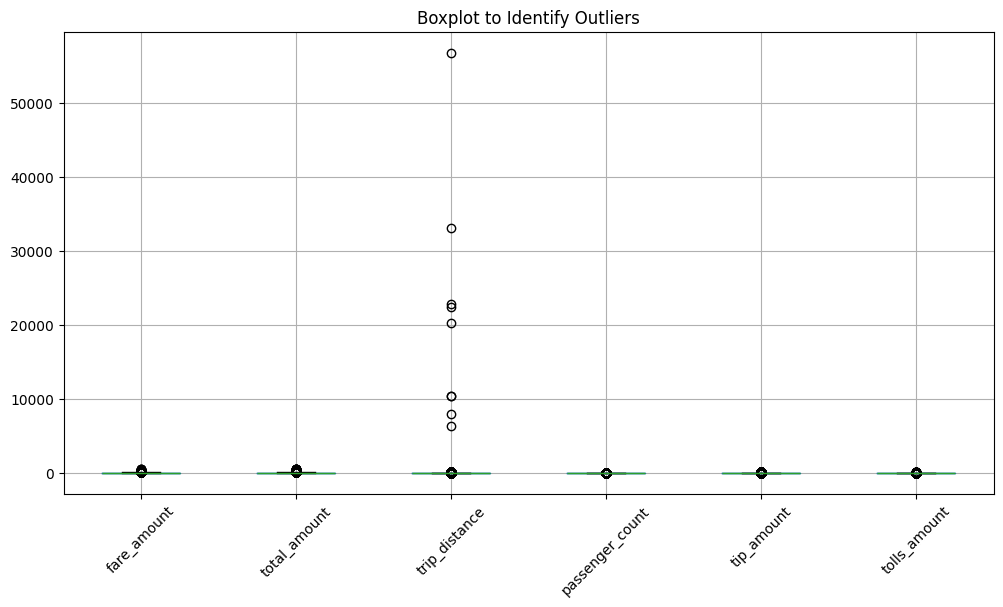

In [ ]:
plt.figure(figsize=(12, 6))
NYC_df[cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot to Identify Outliers")
plt.show()

In [ ]:
#sns.pairplot(NYC_df[cols])
#plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
NYC_df = NYC_df[NYC_df["passenger_count"] <= 6]

In [ ]:
NYC_df[NYC_df["passenger_count"] > 6]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, pickup_date, pickup_hour]
Index: []

[0 rows x 21 columns]

In [ ]:
# Continue with outlier handling
#Removing entries where trip_distance is nearly 0 and fare_amount is more than 300
NYC_df = NYC_df[~((NYC_df["trip_distance"] <= 0.1) & (NYC_df["fare_amount"] > 300))]

In [ ]:
#Removing entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
NYC_df = NYC_df[~((NYC_df["trip_distance"] == 0) & (NYC_df["fare_amount"] == 0) &
                  (NYC_df["PULocationID"] != NYC_df["DOLocationID"]))]

In [ ]:
#Removing entries where trip_distance is more than 250 miles
NYC_df = NYC_df[NYC_df["trip_distance"] <= 250]

In [ ]:
# Removing entries where payment_type is 0 (invalid)
NYC_df = NYC_df[NYC_df["payment_type"] != 0]

In [ ]:
NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289543 entries, 0 to 299999
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               289543 non-null  int64  
 1   tpep_pickup_datetime   289543 non-null  object 
 2   tpep_dropoff_datetime  289543 non-null  object 
 3   passenger_count        289543 non-null  float64
 4   trip_distance          289543 non-null  float64
 5   RatecodeID             289543 non-null  float64
 6   store_and_fwd_flag     289543 non-null  object 
 7   PULocationID           289543 non-null  int64  
 8   DOLocationID           289543 non-null  int64  
 9   payment_type           289543 non-null  int64  
 10  fare_amount            289543 non-null  float64
 11  extra                  289543 non-null  float64
 12  mta_tax                289543 non-null  float64
 13  tip_amount             289543 non-null  float64
 14  tolls_amount           289543 non-null  f

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
NYC_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_date',
 'pickup_hour']

In [ ]:
NYC_df.to_csv('cleaned_dataset_NYC.csv', index=False)
from google.colab import files
files.download('cleaned_dataset_NYC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Numerical and Categorical
* `tpep_pickup_datetime`: Datetime
* `tpep_dropoff_datetime`: Datetime
* `passenger_count`: Numerical and Categorical
* `trip_distance`: Numerical
* `RatecodeID`: Numerical and Categorical
* `PULocationID`: Numerical and Categorical
* `DOLocationID`: Numerical and Categorical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`: Numerical
* `extra`: Numerical
* `mta_tax`: Numerical and Categorical
* `tip_amount`: Numerical
* `tolls_amount`: Numerical
* `improvement_surcharge`: Numerical and Categorical
* `total_amount`: Numerical
* `congestion_surcharge`: Numerical
* `airport_fee`: Numerical

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
cleaned_df= pd.read_csv("cleaned_dataset_NYC.csv")

In [ ]:
cleaned_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    0.0      0.5       12.35           0.0   
1             1  ...    0.0      0.5        3.33           0.0   
2             1  ...    1.0      0.5        3.28           0.0   
3             1  ...    2.5      0.5        4.60           0.0   
4             1  ...    0.0      0.5        4.34           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  Airport_fee  \
0                    1.0         74.25                   0.0          0.0   
1                    1.0         16.63                   2.5          0.0   
2                    1.0         19.68                   2.5          0.0   
3                    1.0         20.00                   2.5          0.0   
4                    1.0         26.04                   2.5          0.0   

   pickup_date pickup_hour  
0   2023-06-25          14  
1   2023-09-09          11  
2   2023-10-13           2  
3   2023-07-10          12  
4   2023-11-08          15  

[5 rows x 21 columns]

In [ ]:
cleaned_df.shape

(289543, 21)

In [ ]:
# Find and show the hourly trends in taxi pickups
cleaned_df["tpep_pickup_datetime"] = pd.to_datetime(cleaned_df["tpep_pickup_datetime"])
cleaned_df["pickup_hour"] = cleaned_df["tpep_pickup_datetime"].dt.hour
hourly_taxi_pickups = cleaned_df.groupby("pickup_hour").size()

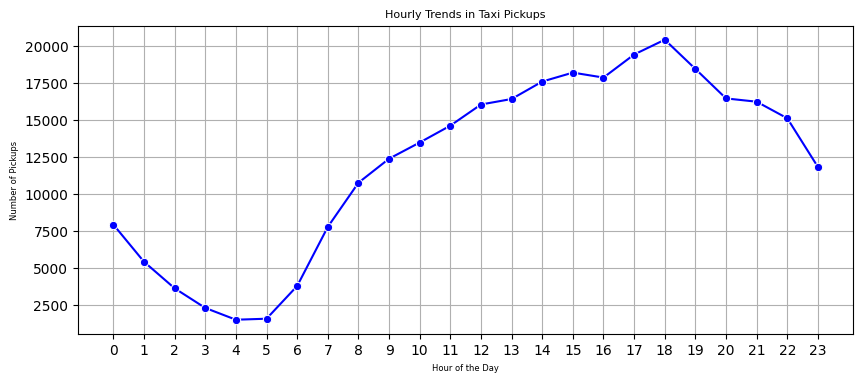

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(x=hourly_taxi_pickups.index, y=hourly_taxi_pickups.values, marker="o", color="b")
plt.title("Hourly Trends in Taxi Pickups", fontsize=8)
plt.xlabel("Hour of the Day", fontsize=6)
plt.ylabel("Number of Pickups", fontsize=6)
plt.xticks(range(24))
plt.grid(True)
plt.show()

Peaks in the morning (commute hours) and evening (rush hour).
Decline in late-night/early-morning hours.

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
cleaned_df["pickup_day"] = cleaned_df["tpep_pickup_datetime"].dt.day_name()
daily_pickups = cleaned_df["pickup_day"].value_counts()
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_pickups = daily_pickups.reindex(order_days)

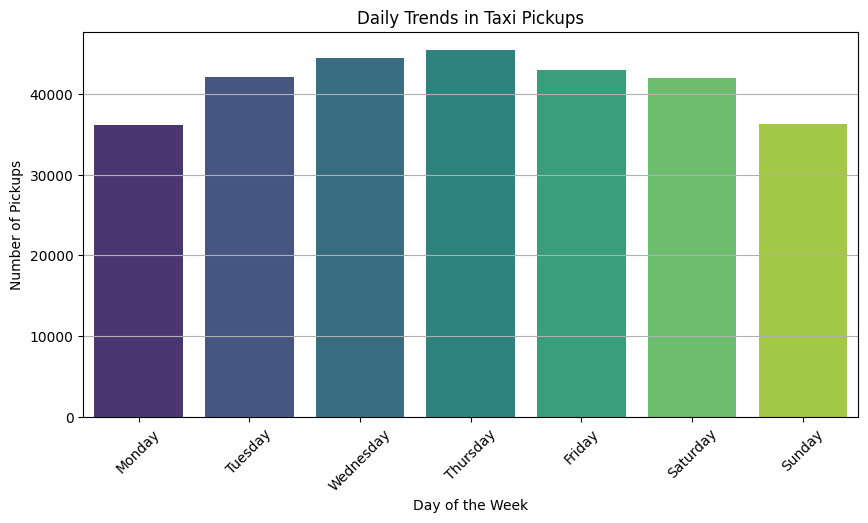

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette="viridis")
plt.title("Daily Trends in Taxi Pickups", fontsize=12)
plt.xlabel("Day of the Week", fontsize=10)
plt.ylabel("Number of Pickups", fontsize=10)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [ ]:
# Show the monthly trends in pickups
cleaned_df["pickup_month"] = cleaned_df["tpep_pickup_datetime"].dt.month_name()
monthly_pickups = cleaned_df["pickup_month"].value_counts()
order_months = ["January", "February", "March", "April", "May", "June",
                "July", "August", "September", "October", "November", "December"]
monthly_pickups = monthly_pickups.reindex(order_months)

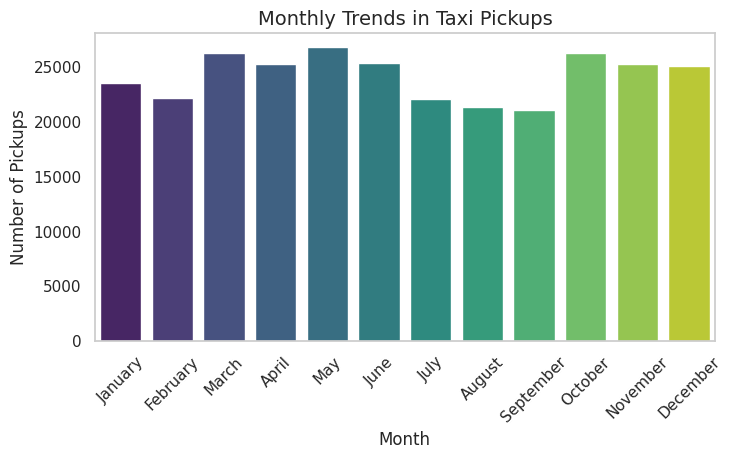

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette="viridis")
plt.title("Monthly Trends in Taxi Pickups", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

Peak Demand in March, April, May, and October. Drop in Summer (July, August, September). Steady Demand in Winter (November, December, January, February)

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
financial_parameters = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

# Check for zero and negative values in each column
for col in financial_parameters:
    zero_values = (cleaned_df[col] == 0).sum()
    negative_values = (cleaned_df[col] < 0).sum()
    print(f"Column: {col}")
    print(f"Zero Values: {zero_values}")
    print(f"Negative Values: {negative_values}")
    print()


Column: fare_amount
Zero Values: 80
Negative Values: 0

Column: tip_amount
Zero Values: 64490
Negative Values: 0

Column: total_amount
Zero Values: 46
Negative Values: 0

Column: trip_distance
Zero Values: 3635
Negative Values: 0



fare_amount: 80 trips had a fare of 0, these trips had zero fare, which could indicate canceled rides, promotional discounts, or data errors.

tip_amount: A large number (64,490) of trips had no tips, This is common because: Many passengers don’t tip.Tips are often given in cash, which may not be recorded in the dataset.

total_amount: 46 trips resulted in a total of 0, might be due to fare adjustments, refunds, or errors.

trip_distance: 3,635 trips recorded 0 distance, which could mean: Cancellations after starting the meter, short trips where GPS didn’t capture movement,
data recording errors.

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
filtered_NYC_df = cleaned_df[(NYC_df["fare_amount"] > 0) &
                 (cleaned_df["tip_amount"] > 0) &
                 (cleaned_df["total_amount"] > 0)]


In [ ]:
filtered_NYC_df.shape

(217148, 23)

In [ ]:
cleaned_df.shape

(289543, 23)

In [ ]:
filtered_NYC_df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-06-25 14:02:50   2023-06-25 14:54:33              1.0   
1         2  2023-09-09 11:47:33   2023-09-09 11:55:09              1.0   
2         2  2023-10-13 02:54:45   2023-10-13 03:04:02              1.0   
3         1  2023-07-10 12:08:14   2023-07-10 12:17:15              1.0   
4         2  2023-11-08 15:38:53   2023-11-08 15:56:51              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0          12.60         1.0                  N           132           181   
1           1.05         1.0                  N           239           142   
2           1.85         1.0                  N           114           164   
3           1.80         1.0                  N           239            75   
4           2.61         1.0                  N           186           113   

   payment_type  ...  tip_amount  tolls_amount  improvement_surcharge  \
0             1  ...       12.35           0.0                    1.0   
1             1  ...        3.33           0.0                    1.0   
2             1  ...        3.28           0.0                    1.0   
3             1  ...        4.60           0.0                    1.0   
4             1  ...        4.34           0.0                    1.0   

   total_amount  congestion_surcharge  Airport_fee  pickup_date  pickup_hour  \
0         74.25                   0.0          0.0   2023-06-25           14   
1         16.63                   2.5          0.0   2023-09-09           11   
2         19.68                   2.5          0.0   2023-10-13            2   
3         20.00                   2.5          0.0   2023-07-10           12   
4         26.04                   2.5          0.0   2023-11-08           15   

   pickup_day pickup_month  
0      Sunday         June  
1    Saturday    September  
2      Friday      October  
3      Monday         July  
4   Wednesday     November  

[5 rows x 23 columns]

In [ ]:
filtered_NYC_df.to_csv('filtered_NYC_df.csv', index=False)
from google.colab import files
files.download('filtered_NYC_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

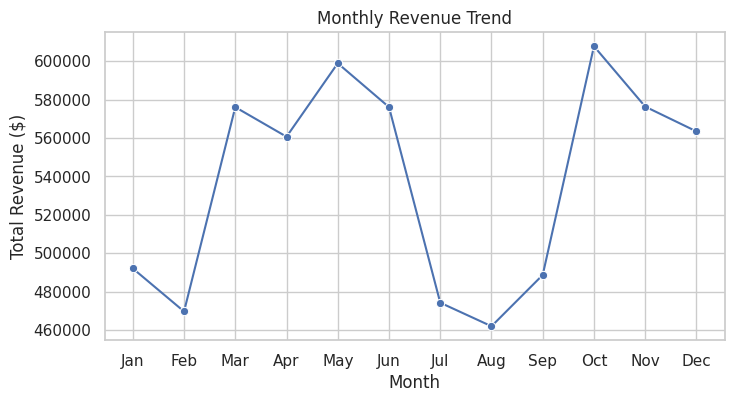

In [ ]:
# Group data by month and analyse monthly revenue
filtered_NYC_df["month"] = pd.to_datetime(filtered_NYC_df["tpep_pickup_datetime"]).dt.month
monthly_revenue = filtered_NYC_df.groupby("month")["total_amount"].sum()

plt.figure(figsize=(8, 4))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()


Highest Revenue → October had the most earnings.
Lowest Revenue → August had the least revenue, likely due to fewer rides.
Revenue Fluctuations → Possible seasonal effects, holidays, or tourist trends impacting earnings.

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
filtered_NYC_df["quarter"] = pd.to_datetime(filtered_NYC_df["tpep_pickup_datetime"]).dt.quarter

# Group by quarter and sum total revenue
quarterly_revenue = filtered_NYC_df.groupby("quarter")["total_amount"].sum()

# Calculate percentage contribution
quarterly_revenue_percentage = (quarterly_revenue / quarterly_revenue.sum()) * 100


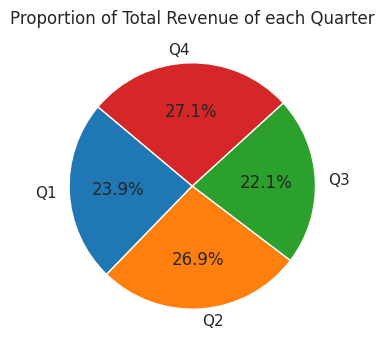

In [ ]:
labels = ["Q1", "Q2", "Q3", "Q4"]
values = quarterly_revenue.values
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.figure(figsize=(8, 4))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Total Revenue of each Quarter")
plt.show()

Q2 & Q4 contributed the most revenue—possibly due to spring/summer tourism and holiday season travel.
Q3 had the lowest share, aligning with the earlier observation of lower revenue in August.
Q1 had moderate revenue, which might indicate a stable start to the year.

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation between trip distance and fare amount: 0.95


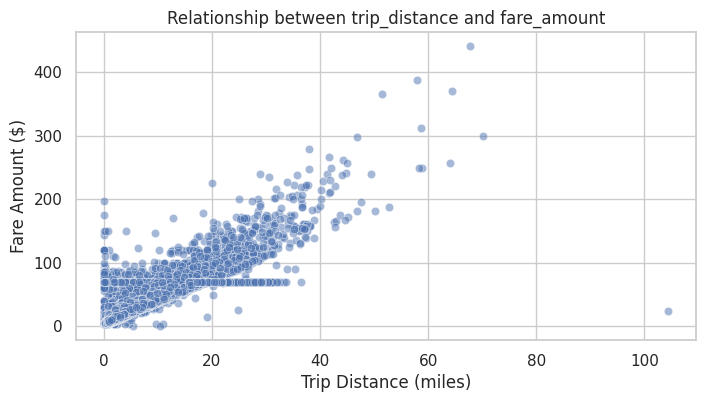

In [ ]:
# Show how trip fare is affected by distance
filtered_trips = filtered_NYC_df[filtered_NYC_df["trip_distance"] > 0]
correlation = filtered_trips["trip_distance"].corr(filtered_trips["fare_amount"])
print(f"Correlation between trip distance and fare amount: {correlation:.2f}")
plt.figure(figsize=(8, 4))
sns.scatterplot(x=filtered_trips["trip_distance"], y=filtered_trips["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship between trip_distance and fare_amount")
plt.grid(True)
plt.show()


The correlation value of 0.95 indicates a very strong positive relationship between trip_distance and fare_amount. This means that as the trip distance increases, the fare amount also increases in a nearly linear manner.

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare amount and trip duration: 0.32


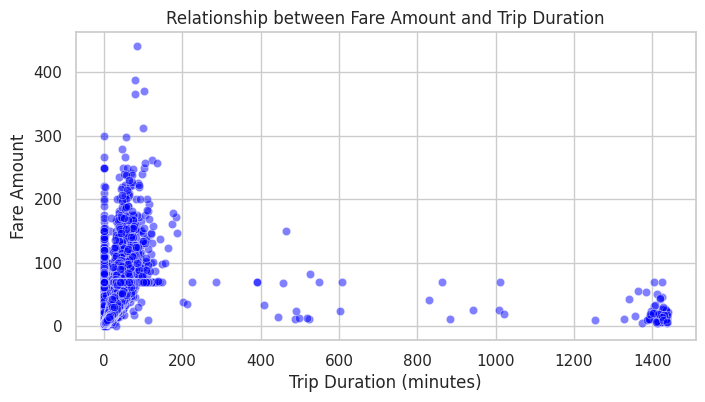

In [ ]:
# Show relationship between fare amount and trip duration
filtered_NYC_df["tpep_pickup_datetime"] = pd.to_datetime(filtered_NYC_df["tpep_pickup_datetime"])
filtered_NYC_df["tpep_dropoff_datetime"] = pd.to_datetime(filtered_NYC_df["tpep_dropoff_datetime"])

# Calculate trip duration in minutes
filtered_NYC_df["trip_duration"] = (filtered_NYC_df["tpep_dropoff_datetime"] - filtered_NYC_df["tpep_pickup_datetime"]).dt.total_seconds() / 60
filtered_fare_trips = filtered_NYC_df[filtered_NYC_df["trip_duration"] > 0]
correlation = filtered_fare_trips["trip_duration"].corr(filtered_fare_trips["fare_amount"])
print(f"Correlation between fare amount and trip duration: {correlation:.2f}")
plt.figure(figsize=(8, 4))
sns.scatterplot(x=filtered_fare_trips["trip_duration"],
                y=filtered_fare_trips["fare_amount"],
                alpha=0.5,
                color="blue")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount")
plt.title("Relationship between Fare Amount and Trip Duration")
plt.grid(True)
plt.show()


The correlation value of 0.32 suggests a weak-to-moderate positive relationship between trip duration and fare amount.

Correlation between fare amount and passenger count: 0.04


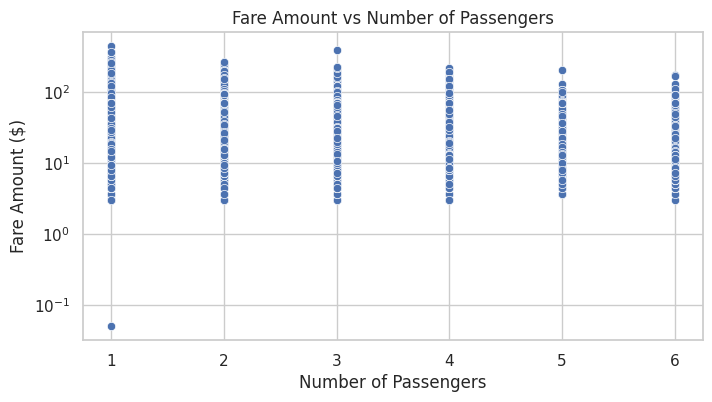

In [ ]:
# Show relationship between fare and number of passengers
filtered_df = filtered_NYC_df[filtered_NYC_df["fare_amount"] > 0]
correlation = filtered_df["fare_amount"].corr(filtered_df["passenger_count"])
print(f"Correlation between fare amount and passenger count: {correlation:.2f}")
plt.figure(figsize=(8, 4))
sns.scatterplot(x=filtered_df["passenger_count"], y=filtered_df["fare_amount"])
plt.xlabel("Number of Passengers")
plt.ylabel("Fare Amount ($)")
plt.title("Fare Amount vs Number of Passengers")
plt.yscale("log")
plt.show()

The correlation value is 0.04, indicating almost no relationship between fare amount and the number of passengers.

Correlation between tip amount and trip distance: 0.80


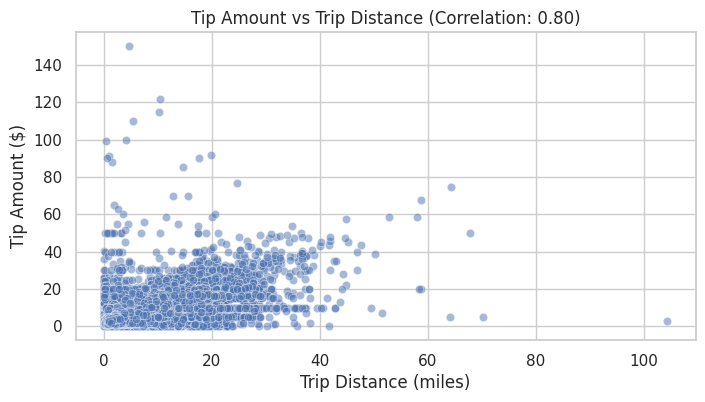

In [ ]:
# Show relationship between tip and trip distance

filtered_df = filtered_NYC_df[filtered_NYC_df["trip_distance"] > 0]

correlation = filtered_df["tip_amount"].corr(filtered_df["trip_distance"])
print(f"Correlation between tip amount and trip distance: {correlation:.2f}")

plt.figure(figsize=(8, 4))
sns.scatterplot(x=filtered_df["trip_distance"], y=filtered_df["tip_amount"], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.title(f"Tip Amount vs Trip Distance (Correlation: {correlation:.2f})")
plt.show()

The correlation value of 0.80 suggests a strong positive relationship between tip amount and trip distance.This means that longer trips generally result in higher tips.

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

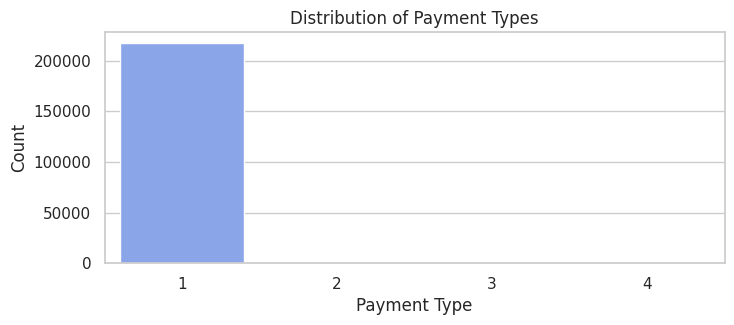

In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = filtered_NYC_df["payment_type"].value_counts()

plt.figure(figsize=(8, 3))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, palette="coolwarm")

plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.title("Distribution of Payment Types")
plt.xticks(rotation=0)
plt.show()


The vast majority of payments were made using Payment Type 1, which typically represents credit card transactions in NYC taxi data.

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
#pip install geopandas

In [ ]:
#!pip uninstall -y shapely
#!pip install shapely==1.8.5.post1 geopandas --no-cache-dir

In [ ]:
import shapely
import geopandas as gpd

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:

shapefile_path = "/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp"
zones = gpd.read_file(shapefile_path)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

In [ ]:
zones.shape

(263, 7)

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

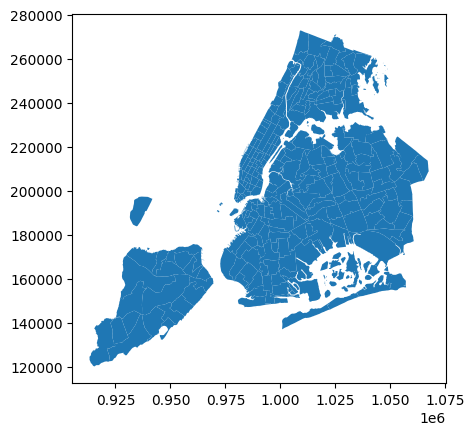

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

# Merge trip data with taxi zones data on PULocationID
merged_df = filtered_NYC_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Drop redundant LocationID column
merged_df.drop(columns=['LocationID'], inplace=True)

merged_df.to_csv("merged_trip_data.csv", index=False)
files.download("merged_trip_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_df.shape

(217151, 32)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips

trip_counts = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')
trip_counts

PULocationID  total_trips
0               1           16
1               4          216
2               6            1
3               7           54
4               8            1
..            ...          ...
168           261         1021
169           262         2934
170           263         4190
171           264         1971
172           265           86

[173 rows x 2 columns]

There are 173 unique pickup locations in the data

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
gdf_zones_with_trips = zones.merge(trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 for locations with no trips
gdf_zones_with_trips['total_trips'] = gdf_zones_with_trips['total_trips'].fillna(0)



The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

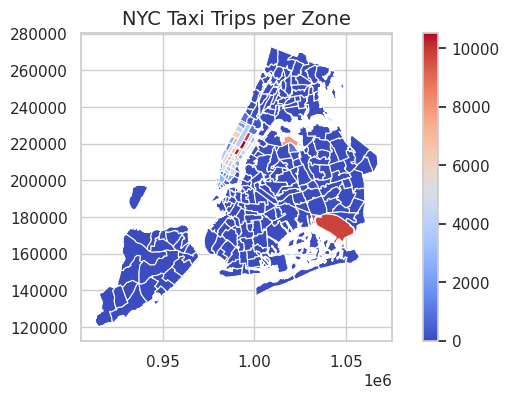

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
gdf_zones_with_trips.plot(
    column='total_trips',
    cmap='coolwarm',
    linewidth=0.8,
    legend=True,
    ax=ax
)
ax.set_title("NYC Taxi Trips per Zone", fontsize=14)

# Show the plot
plt.show()


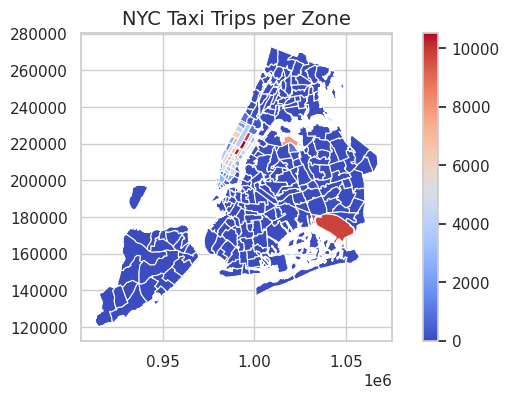

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
gdf_zones_sorted = gdf_zones_with_trips.sort_values(by='total_trips', ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

gdf_zones_with_trips.plot(
    column='total_trips',
    cmap='coolwarm',
    linewidth=0.8,
    legend=True,
    ax=ax
)
ax.set_title("NYC Taxi Trips per Zone", fontsize=14)
# Show the plot
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_date',
       'pickup_hour', 'pickup_day', 'pickup_month', 'month', 'quarter',
       'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry'],
      dtype='object')

In [ ]:
from shapely.geometry import LineString

       PULocationID  DOLocationID  pickup_hour  avg_duration  total_distance  \
38573           226           226           20      0.007778             0.0   
38306           223           223           21      0.002222             0.0   
38304           223           223            9      0.001111             0.0   
33869           164           264           20      0.000278             0.0   
1499             41            41           17      0.001389             0.0   
35355           170           238            3      0.328056             0.0   
38270           216           264            2      0.000556             0.0   
37105           202           202            1      0.016944             0.0   
37106           202           202            3      0.003056             0.0   
37107           202           202           23      0.001944             0.0   

       avg_speed_mph  
38573            0.0  
38306            0.0  
38304            0.0  
33869            0.0  
1499

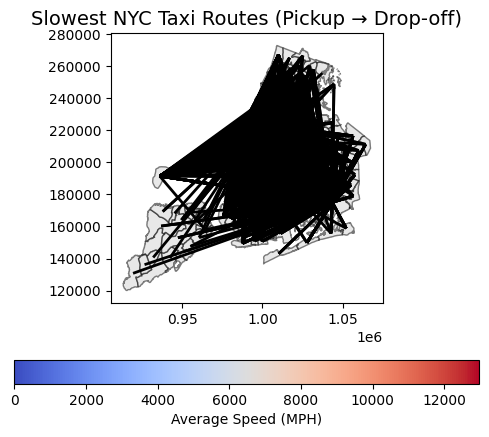

In [ ]:
# Find routes which have the slowest speeds at different times of the day

# Convert pickup and dropoff times to datetime
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])
merged_df['tpep_dropoff_datetime'] = pd.to_datetime(merged_df['tpep_dropoff_datetime'])

# Calculate trip duration in hours
merged_df['trip_duration_hours'] = (merged_df['tpep_dropoff_datetime'] - merged_df['tpep_pickup_datetime']).dt.total_seconds() / 3600

# Filter out invalid durations (e.g., trips with zero or negative durations)
merged_df = merged_df[merged_df['trip_duration_hours'] > 0]

# Extract pickup hour
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Group by pickup zone, drop-off zone, and hour of the day
route_hourly_stats = merged_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    avg_duration=('trip_duration_hours', 'mean'),
    total_distance=('trip_distance', 'sum')
).reset_index()

# Compute average speed (miles per hour)
route_hourly_stats['avg_speed_mph'] = route_hourly_stats['total_distance'] / route_hourly_stats['avg_duration']

# Remove infinite or NaN speed values
route_hourly_stats = route_hourly_stats.replace([float('inf'), -float('inf')], None).dropna()

# Sort by slowest speeds (ascending order)
slowest_routes = route_hourly_stats.sort_values(by='avg_speed_mph', ascending=True)

# Save slowest routes to a CSV file
slowest_routes.to_csv("slowest_routes.csv", index=False)

# Print top 10 slowest routes
print(slowest_routes.head(10))

# Visualization of slow routes
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

# Merge pickup and drop-off locations with geometric data
slowest_routes = slowest_routes.merge(
    zones[['LocationID', 'geometry']], left_on='PULocationID', right_on='LocationID', how='left'
).rename(columns={'geometry': 'pickup_geom'})

slowest_routes = slowest_routes.merge(
    zones[['LocationID', 'geometry']], left_on='DOLocationID', right_on='LocationID', how='left'
).rename(columns={'geometry': 'dropoff_geom'})

# Create route lines from pickup to drop-off locations
slowest_routes['route_geometry'] = slowest_routes.apply(
    lambda row: LineString([row['pickup_geom'].centroid, row['dropoff_geom'].centroid])
    if row['pickup_geom'] is not None and row['dropoff_geom'] is not None else None, axis=1
)

# Convert to GeoDataFrame
gdf_routes = gpd.GeoDataFrame(slowest_routes, geometry='route_geometry', crs=zones.crs)

# Drop routes with missing geometry
gdf_routes = gdf_routes.dropna(subset=['route_geometry'])

# Plot the slow routes
zones.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
gdf_routes.plot(
    column='avg_speed_mph',
    cmap='coolwarm',
    linewidth=2,
    edgecolor='black',
    legend=True,
    legend_kwds={'label': "Average Speed (MPH)", 'orientation': "horizontal"},
    ax=ax
)

ax.set_title("Slowest NYC Taxi Routes (Pickup → Drop-off)", fontsize=14)
plt.show()

In [ ]:
zones.columns

Index(['OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone', 'LocationID', 'borough',
       'geometry'],
      dtype='object')

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

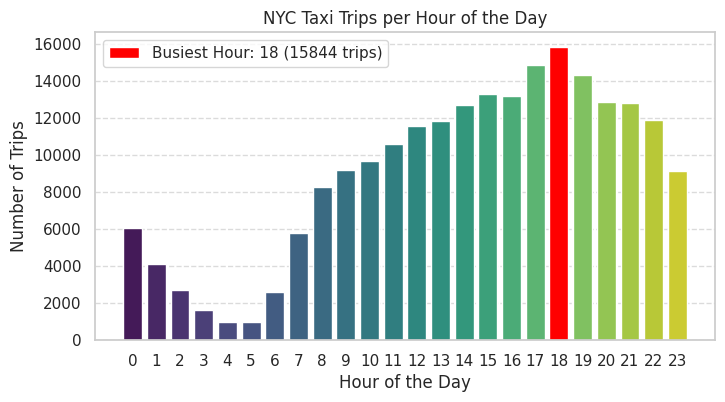

The busiest hour is 18:00 with 15844 trips.


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'])

# Extract hour from pickup time
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Count the number of trips per hour
hourly_trip_counts = merged_df['pickup_hour'].value_counts().sort_index()

# Find the busiest hour
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_count = hourly_trip_counts.max()

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=hourly_trip_counts.index, y=hourly_trip_counts.values, palette="viridis")

# Highlight the busiest hour in red
plt.bar(busiest_hour, busiest_hour_count, color='red', label=f'Busiest Hour: {busiest_hour} ({busiest_hour_count} trips)')

plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Trips per Hour of the Day")
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Print the busiest hour information
print(f"The busiest hour is {busiest_hour}:00 with {busiest_hour_count} trips.")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

Top 5 Busiest Hours (Estimated Actual Number of Trips):
Hour 18:00 → 15,844 trips
Hour 17:00 → 14,881 trips
Hour 19:00 → 14,349 trips
Hour 15:00 → 13,311 trips
Hour 16:00 → 13,180 trips


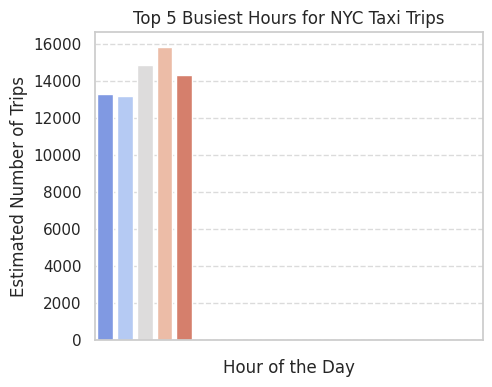

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.1
top_5_hours = hourly_trip_counts.nlargest(5)

# Print the results
print("Top 5 Busiest Hours (Estimated Actual Number of Trips):")
for hour, count in top_5_hours.items():
    print(f"Hour {hour}:00 → {int(count):,} trips")

# Visualization
plt.figure(figsize=(5, 4))
sns.barplot(x=top_5_hours.index, y=top_5_hours.values, palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Estimated Number of Trips")
plt.title("Top 5 Busiest Hours for NYC Taxi Trips")
plt.xticks(top_5_hours.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends
merged_df['tpep_pickup_datetime'] = pd.to_datetime(merged_df['tpep_pickup_datetime'], errors='coerce')
merged_df = merged_df.dropna(subset=['tpep_pickup_datetime'])
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['day_of_week'] = merged_df['tpep_pickup_datetime'].dt.dayofweek
merged_df['is_weekend'] = merged_df['day_of_week'] >= 5

hourly_traffic = merged_df.groupby(['pickup_hour', 'is_weekend']).size().unstack(fill_value=0)

if hourly_traffic.shape[1] == 1:
    if False in hourly_traffic.columns:
        hourly_traffic = hourly_traffic.rename(columns={False: "Weekday"})
        hourly_traffic["Weekend"] = 0
    else:
        hourly_traffic = hourly_traffic.rename(columns={True: "Weekend"})
        hourly_traffic["Weekday"] = 0
else:
    hourly_traffic.columns = ["Weekday", "Weekend"]

print(hourly_traffic.head(24))
print(hourly_traffic.describe())

             Weekday  Weekend
pickup_hour                  
0               2941     3128
1               1475     2651
2                765     1970
3                431     1221
4                386      605
5                803      201
6               2244      384
7               5153      656
8               7203     1054
9               7451     1764
10              7341     2321
11              7809     2774
12              8267     3309
13              8551     3284
14              9245     3488
15              9785     3526
16              9627     3553
17             11246     3635
18             12199     3645
19             10893     3456
20              9787     3055
21              9898     2905
22              9021     2894
23              6529     2612
            Weekday      Weekend
count     24.000000    24.000000
mean    6627.083333  2420.458333
std     3840.734191  1146.560261
min      386.000000   201.000000
25%     2766.750000  1628.250000
50%     7630.000000  2

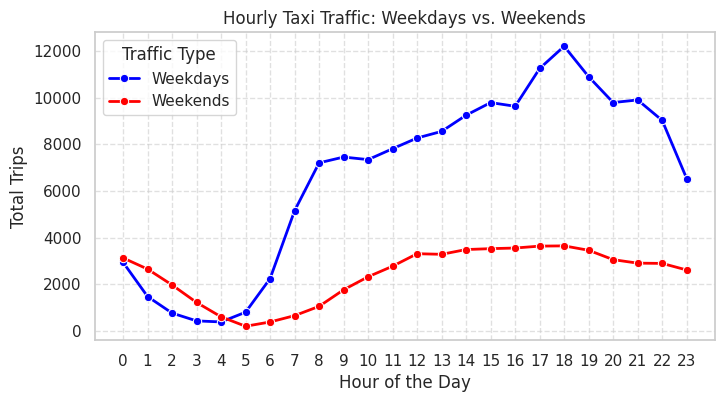

In [ ]:
# Plot the hourly traffic trends
plt.figure(figsize=(8,4))
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic["Weekday"], marker='o', linewidth=2, label="Weekdays", color='blue')
sns.lineplot(x=hourly_traffic.index, y=hourly_traffic["Weekend"], marker='o', linewidth=2, label="Weekends", color='red')

plt.xlabel("Hour of the Day")
plt.ylabel("Total Trips")
plt.title("Hourly Taxi Traffic: Weekdays vs. Weekends")
plt.xticks(range(0, 24))
plt.legend(title="Traffic Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Weekday Peaks (Morning & Evening Rush)
Sharp rise in trips from 6 AM, peaking around 8-9 AM → Morning Commute.
Another major peak at 5-7 PM → Evening Commute.
After 9 PM, trips gradually decline.

Weekend Pattern
More evenly spread throughout the day.
No sharp morning rush, gradual increase from 9 AM.
Evening traffic is more consistent but lower compared to weekdays.

Late Night Trends
Weekends have relatively higher late-night trips.Weekdays drop sharply after midnight.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

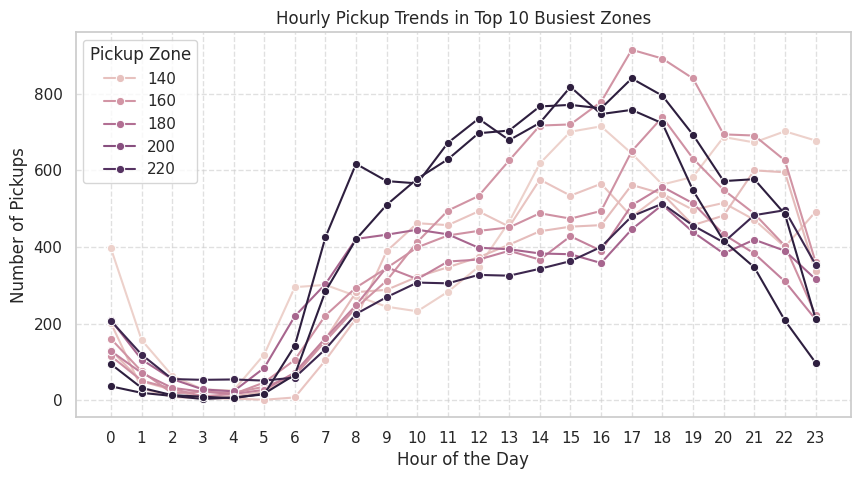

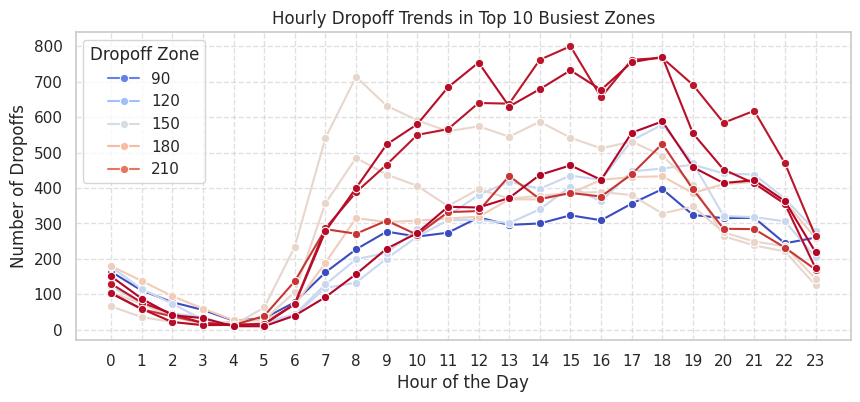

In [ ]:
# Find top 10 pickup and dropoff zones
# Group by pickup zone and hour, then count trips
pickup_counts = merged_df.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='num_trips')

# Group by drop-off zone and hour, then count trips
dropoff_counts = merged_df.groupby(['DOLocationID', 'pickup_hour']).size().reset_index(name='num_trips')

# Find the top 10 busiest pickup zones
top_pickup_zones = pickup_counts.groupby('PULocationID')['num_trips'].sum().nlargest(10).index

# Find the top 10 busiest dropoff zones
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['num_trips'].sum().nlargest(10).index

# Filter data for top 10 pickup zones
top_pickup_trends = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

# Filter data for top 10 dropoff zones
top_dropoff_trends = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot hourly pickup trends
plt.figure(figsize=(10, 5))
sns.lineplot(data=top_pickup_trends, x='pickup_hour', y='num_trips', hue='PULocationID', marker='o')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Pickup Trends in Top 10 Busiest Zones")
plt.xticks(range(0, 24))
plt.legend(title="Pickup Zone")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Plot hourly dropoff trends
plt.figure(figsize=(10, 4))
sns.lineplot(data=top_dropoff_trends, x='pickup_hour', y='num_trips', hue='DOLocationID', marker='o', palette="coolwarm")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Dropoffs")
plt.title("Hourly Dropoff Trends in Top 10 Busiest Zones")
plt.xticks(range(0, 24))
plt.legend(title="Dropoff Zone")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


The hourly pickup trends for the top 10 busiest zones :->
Morning Peak (7 AM - 10 AM):
Sharp increase in pickups around 7 AM.
This suggests high demand for taxis, likely due to morning commuters.
Afternoon & Evening Peak (3 PM - 7 PM):
Another increase in pickups, peaking around 5 PM - 7 PM.
This aligns with office closing hours and evening activities.
Late Night & Early Morning (12 AM - 5 AM):
Low taxi demand during these hours.
Some zones might still have moderate activity, possibly due to nightlife or airport traffic.


Dropoff trends plot :->
Morning Peak (7 AM - 10 AM)
Sharp rise in drop-offs, indicating people reaching work or other destinations.
Afternoon & Evening Peak (3 PM - 7 PM)
Another high activity period, likely due to people finishing work and heading home.
Late Night & Early Morning (12 AM - 5 AM)
Drop-off counts remain low except for specific zones.

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

Top 10 Zones with Highest Pickup/Dropoff Ratios:
     pickups  dropoffs  pickup_dropoff_ratio
70    1001.0        88             11.247191
132   9794.0      2117              4.624174
138   7896.0      2796              2.823025
186   7575.0      4570              1.657187
114   3123.0      2163              1.443161
43    3793.0      2710              1.399115
249   5231.0      4041              1.294161
215     18.0        13              1.285714
162   8093.0      6305              1.283381
100   3238.0      2608              1.241089

Top 10 Zones with Lowest Pickup/Dropoff Ratios:
    pickups  dropoffs  pickup_dropoff_ratio
3       0.0         8                   0.0
5       0.0         1                   0.0
9       0.0        19                   0.0
11      0.0         6                   0.0
15      0.0        13                   0.0
16      0.0        17                   0.0
18      0.0         8                   0.0
19      0.0        13                   0.0
20      0.0

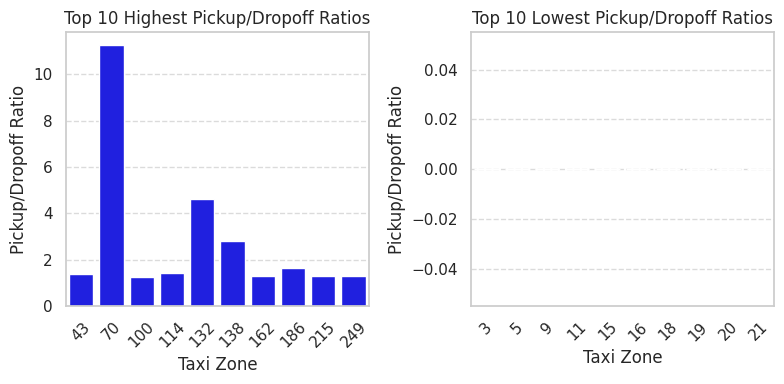

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_df.groupby('PULocationID').size().rename("pickups")
dropoff_counts = merged_df.groupby('DOLocationID').size().rename("dropoffs")

# Merge counts into a single DataFrame
zone_traffic = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)

# Compute the pickup/dropoff ratio
zone_traffic['pickup_dropoff_ratio'] = zone_traffic['pickups'] / (zone_traffic['dropoffs'] + 1)  # Avoid division by zero

# Find top 10 highest and lowest pickup/dropoff ratios
top_10_highest = zone_traffic.nlargest(10, 'pickup_dropoff_ratio')
top_10_lowest = zone_traffic.nsmallest(10, 'pickup_dropoff_ratio')

# Display results
print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(top_10_highest)
print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(top_10_lowest)

# Plot the top 10 highest and lowest pickup/dropoff ratios in separate subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(x=top_10_highest.index, y=top_10_highest['pickup_dropoff_ratio'], color='blue', ax=axes[0])
axes[0].set_title("Top 10 Highest Pickup/Dropoff Ratios")
axes[0].set_xlabel("Taxi Zone")
axes[0].set_ylabel("Pickup/Dropoff Ratio")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

sns.barplot(x=top_10_lowest.index, y=top_10_lowest['pickup_dropoff_ratio'], color='red', ax=axes[1])
axes[1].set_title("Top 10 Lowest Pickup/Dropoff Ratios")
axes[1].set_xlabel("Taxi Zone")
axes[1].set_ylabel("Pickup/Dropoff Ratio")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

Top 10 Nighttime Pickup Zones:
PULocationID
79     1983
249    1644
132    1467
148    1262
48     1230
114    1145
230     893
186     821
138     742
164     722
Name: night_pickups, dtype: int64

Top 10 Nighttime Dropoff Zones:
DOLocationID
79     1047
170     786
48      741
107     732
68      727
141     703
249     651
263     619
148     573
236     565
Name: night_dropoffs, dtype: int64


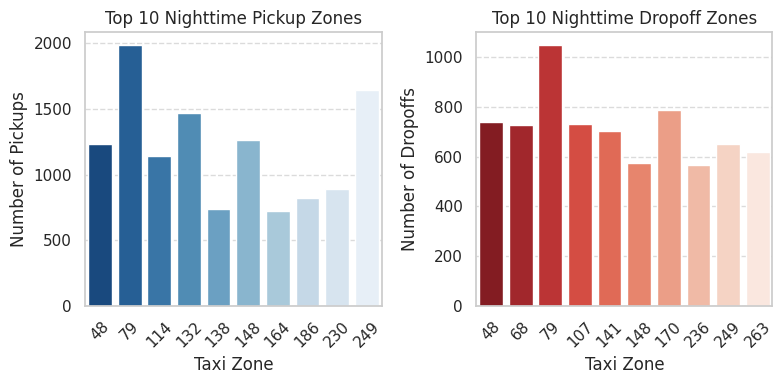

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter trips that occurred during night hours (11 PM - 5 AM)
night_hours = merged_df[(merged_df['pickup_hour'] >= 23) | (merged_df['pickup_hour'] <= 5)]

# Count pickups and dropoffs per zone during night hours
night_pickups = night_hours.groupby('PULocationID').size().rename("night_pickups")
night_dropoffs = night_hours.groupby('DOLocationID').size().rename("night_dropoffs")

# Get top 10 zones for pickups and dropoffs during night hours
top_night_pickups = night_pickups.nlargest(10)
top_night_dropoffs = night_dropoffs.nlargest(10)

# Display results
print("Top 10 Nighttime Pickup Zones:")
print(top_night_pickups)
print("\nTop 10 Nighttime Dropoff Zones:")
print(top_night_dropoffs)

# Visualization: Plot top night pickup and dropoff zones
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pickup Zones Plot
sns.barplot(x=top_night_pickups.index, y=top_night_pickups.values, palette="Blues_r", ax=axes[0])
axes[0].set_title("Top 10 Nighttime Pickup Zones")
axes[0].set_xlabel("Taxi Zone")
axes[0].set_ylabel("Number of Pickups")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Dropoff Zones Plot
sns.barplot(x=top_night_dropoffs.index, y=top_night_dropoffs.values, palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 10 Nighttime Dropoff Zones")
axes[1].set_xlabel("Taxi Zone")
axes[1].set_ylabel("Number of Dropoffs")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Zone 79 appears to have the highest number of night pickups.
Zone 79 is also among the busiest for night drop-offs.
Other zones like 48, 132, 138, 148 are prominent in night pickups.
Zones 68, 107, 236, 263 are among the most common night dropoff points.

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue Share (%) between Night and Day:
time_period
Day      87.831975
Night    12.168025
Name: fare_amount, dtype: float64


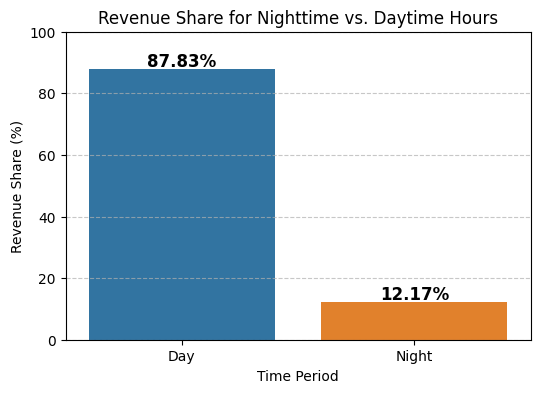

In [ ]:
# Filter for night hours (11 PM to 5 AM)
# Filter for nighttime and daytime hours
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = list(set(range(24)) - set(night_hours))

# Create a new column for time period
merged_df['time_period'] = merged_df['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

# Compute total fare revenue for night and day
revenue_share = merged_df.groupby('time_period')['fare_amount'].sum()

# Convert to percentage
revenue_share_percentage = (revenue_share / revenue_share.sum()) * 100

# Print results
print("Revenue Share (%) between Night and Day:")
print(revenue_share_percentage)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=revenue_share_percentage.index, y=revenue_share_percentage.values, palette=['#1f77b4', '#ff7f0e'])
plt.xlabel("Time Period")
plt.ylabel("Revenue Share (%)")
plt.title("Revenue Share for Nighttime vs. Daytime Hours")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentage on bars
for i, value in enumerate(revenue_share_percentage):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold')

plt.show()


It shows that 87.83% of the revenue comes from daytime rides, while nighttime rides contribute only 12.17%

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

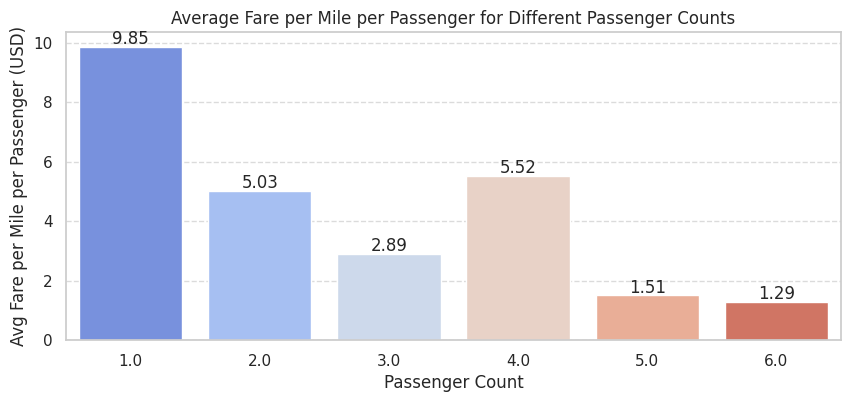

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter out invalid data (zero or negative distances, fares, or passengers)
valid_trips = merged_df[(merged_df['trip_distance'] > 0) &
                        (merged_df['fare_amount'] > 0) &
                        (merged_df['passenger_count'] > 0)]

# Compute fare per mile and fare per mile per passenger
valid_trips['fare_per_mile'] = valid_trips['fare_amount'] / valid_trips['trip_distance']
valid_trips['fare_per_mile_per_passenger'] = valid_trips['fare_per_mile'] / valid_trips['passenger_count']

# Compute average fare per mile per passenger for each passenger count
fare_analysis = valid_trips.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()

# Plot the analysis
plt.figure(figsize=(10, 4))
sns.barplot(x=fare_analysis.index, y=fare_analysis.values, palette="coolwarm")

# Customize plot
plt.xlabel("Passenger Count")
plt.ylabel("Avg Fare per Mile per Passenger (USD)")
plt.title("Average Fare per Mile per Passenger for Different Passenger Counts")

# Add value labels on bars
for i, v in enumerate(fare_analysis.values):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()


Solo passengers pay the highest per mile (~$9.85/mile).

As passenger count increases, fare per mile per passenger drops significantly.
A small spike for 4-passenger trips (~$5.52/mile) might indicate special ride types (e.g., premium fares).
Groups of 5-6 pay the lowest per mile, likely benefiting from fare splitting.



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

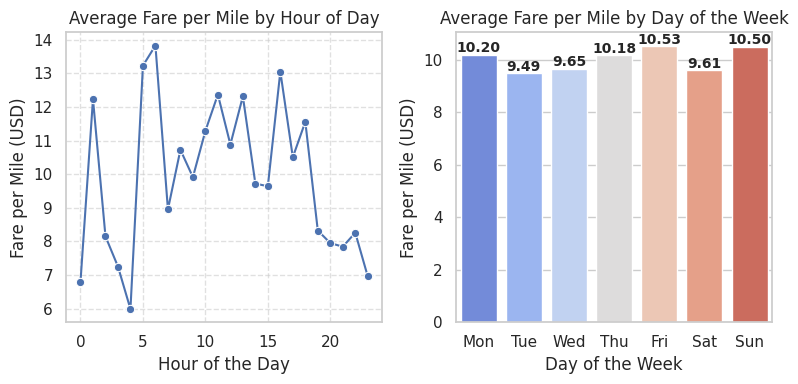

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

# Ensure trip distances are non-zero to avoid division errors
filter_trips = merged_df[merged_df['trip_distance'] > 0].copy()

# Compute fare per mile
filter_trips['fare_per_mile'] = filter_trips['fare_amount'] / filter_trips['trip_distance']

# Extract hour and day of week
filter_trips['pickup_hour'] = filter_trips['tpep_pickup_datetime'].dt.hour
filter_trips['pickup_day'] = filter_trips['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Group by hour and day of week to find average fare per mile
hourly_fare_per_mile = filter_trips.groupby('pickup_hour')['fare_per_mile'].mean()
daily_fare_per_mile = filter_trips.groupby('pickup_day')['fare_per_mile'].mean()

# Define day labels for plotting
day_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Create the visualization
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot average fare per mile by hour
sns.lineplot(x=hourly_fare_per_mile.index, y=hourly_fare_per_mile.values, marker="o", ax=axes[0])
axes[0].set_title("Average Fare per Mile by Hour of Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Fare per Mile (USD)")
axes[0].grid(True, linestyle="--", alpha=0.6)

# Plot average fare per mile by day of week
sns.barplot(x=day_labels, y=daily_fare_per_mile.values, ax=axes[1], palette="coolwarm")
axes[1].set_title("Average Fare per Mile by Day of the Week")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Fare per Mile (USD)")

# Annotate bars with values
for i, val in enumerate(daily_fare_per_mile.values):
    axes[1].text(i, val + 0.1, f"{val:.2f}", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

Morning hours (4-6 AM) have the highest fares per mile, possibly due to airport trips or lower taxi availability.
Fare per mile remains moderate during regular daytime hours (7 AM - 8 PM) with some peaks at morning and afternoon commute times.
Weekend fares (Friday-Sunday) tend to be higher, likely due to leisure and travel-related demand.
Tuesday has the lowest fare per mile, suggesting lower demand.

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

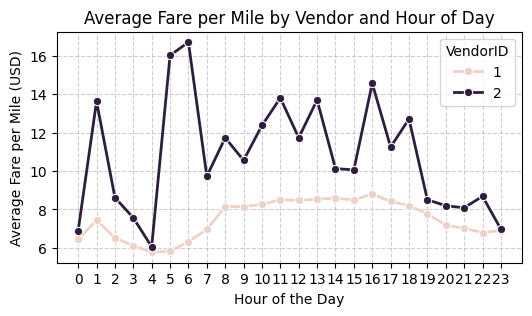

In [ ]:
# Compare fare per mile for different vendors
# Filter out trips with zero or invalid distance to avoid division errors
filter1_trips = merged_df[merged_df['trip_distance'] > 0]

# Compute fare per mile
filter1_trips['fare_per_mile'] = filter1_trips['fare_amount'] / filter1_trips['trip_distance']

# Compute average fare per mile for each vendor by hour of the day
hourly_fare_per_mile = filter1_trips.groupby(['pickup_hour', 'VendorID'])['fare_per_mile'].mean().reset_index()

# Plot the data
plt.figure(figsize=(6, 3))
sns.lineplot(data=hourly_fare_per_mile, x="pickup_hour", y="fare_per_mile", hue="VendorID", marker='o', linewidth=2)

# Customizing the plot
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile (USD)")
plt.title("Average Fare per Mile by Vendor and Hour of Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()


Vendor 2 has significantly higher fluctuations in fare per mile throughout the day compared to Vendor 1.
Vendor 1 maintains a relatively stable fare per mile, averaging between 6 to 8 USD with slight increases during certain hours.
Vendor 2 exhibits extreme fare spikes, especially around 5-6 AM and early morning hours, reaching over 16 USD per mile.
Nighttime (12 AM - 6 AM) shows higher fare variability, possibly due to lower availability of cabs or increased surge pricing.
During daytime (9 AM - 6 PM), Vendor 2 fares remain high, but there are still some fluctuations, whereas Vendor 1 remains stable.
Late evening (7 PM onwards) sees a gradual decrease in fares for both vendors, likely as demand stabilizes.

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
trip_data = pd.read_csv("merged_trip_data.csv")

In [ ]:
trip_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'pickup_date',
       'pickup_hour', 'pickup_day', 'pickup_month', 'month', 'quarter',
       'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry'],
      dtype='object')

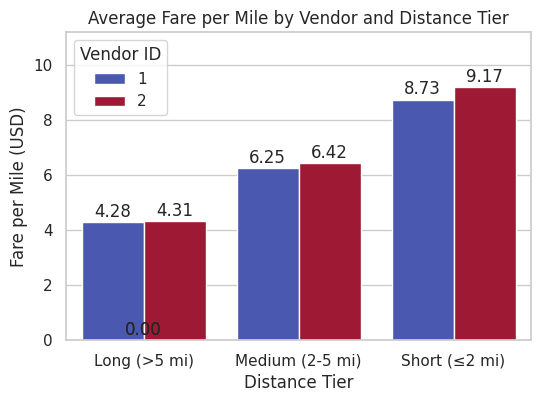

In [ ]:
# Defining distance tiers
trip_data = pd.read_csv("merged_trip_data.csv")
# Categorizing trips into different distance tiers
def categorize_distance(miles):
    if miles <= 2:
        return 'Short (≤2 mi)'
    elif 2 < miles <= 5:
        return 'Medium (2-5 mi)'
    else:
        return 'Long (>5 mi)'

trip_data['Distance Tier'] = trip_data['trip_distance'].apply(categorize_distance)

# Compute average fare per mile for each vendor and distance tier
tiered_fare_analysis = (
    trip_data.groupby(['VendorID', 'Distance Tier'])['fare_amount']
    .sum() / trip_data.groupby(['VendorID', 'Distance Tier'])['trip_distance']
    .sum()
).reset_index()

# Rename columns
tiered_fare_analysis.columns = ['Vendor ID', 'Distance Tier', 'Avg Fare per Mile']

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(data=tiered_fare_analysis, x="Distance Tier", y="Avg Fare per Mile", hue="Vendor ID", palette="coolwarm")

# Customize plot
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile (USD)")
plt.legend(title="Vendor ID")
plt.ylim(0, tiered_fare_analysis['Avg Fare per Mile'].max() + 2)

# Show values on bars
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2, p.get_height() + 0.2, f'{p.get_height():.2f}', ha='center')

plt.show()


Short trips are significantly more expensive per mile due to minimum fare policies.
Vendor 2 generally charges slightly more per mile across all distance tiers than Vendor 1.
The cost per mile decreases as trip distance increases, aligning with common taxi pricing models.

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

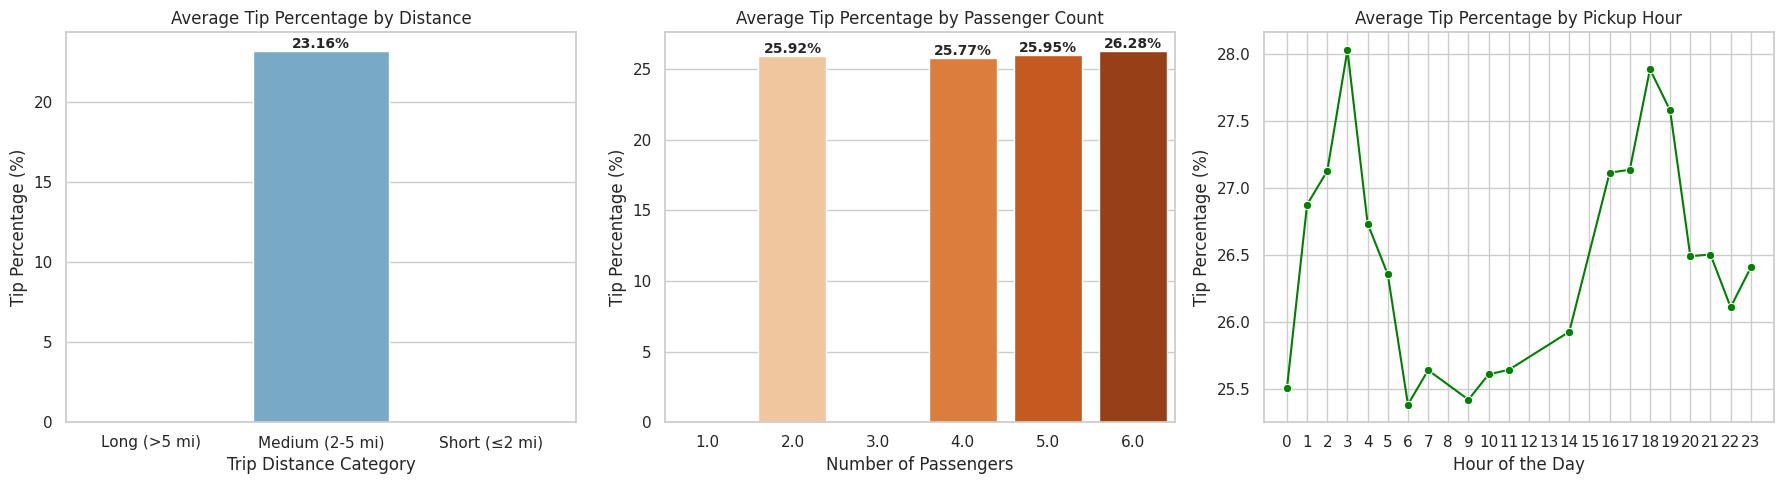

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
f_df = pd.read_csv("merged_trip_data.csv")

# Ensure required columns are present
required_columns = ["fare_amount", "tip_amount", "trip_distance", "passenger_count", "pickup_hour"]
f_df = f_df.dropna(subset=required_columns)

# Compute tip percentage
f_df["tip_percentage"] = (f_df["tip_amount"] / f_df["fare_amount"]) * 100

# Categorizing distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 mi)"
    elif distance <= 5:
        return "Medium (2-5 mi)"
    else:
        return "Long (>5 mi)"

f_df["distance_category"] = f_df["trip_distance"].apply(categorize_distance)

# Aggregate average tip percentages
tip_by_distance = f_df.groupby("distance_category")["tip_percentage"].mean().reset_index()
tip_by_passenger = f_df.groupby("passenger_count")["tip_percentage"].mean().reset_index()
tip_by_hour = f_df.groupby("pickup_hour")["tip_percentage"].mean().reset_index()

# Set plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tip Percentage by Distance
sns.barplot(data=tip_by_distance, x="distance_category", y="tip_percentage", ax=axes[0], palette="Blues")
axes[0].set_title("Average Tip Percentage by Distance")
axes[0].set_ylabel("Tip Percentage (%)")
axes[0].set_xlabel("Trip Distance Category")
for p in axes[0].patches:
    axes[0].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight="bold")

# Tip Percentage by Passenger Count
sns.barplot(data=tip_by_passenger, x="passenger_count", y="tip_percentage", ax=axes[1], palette="Oranges")
axes[1].set_title("Average Tip Percentage by Passenger Count")
axes[1].set_ylabel("Tip Percentage (%)")
axes[1].set_xlabel("Number of Passengers")
for p in axes[1].patches:
    axes[1].annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                     ha='center', va='bottom', fontsize=10, fontweight="bold")

# Tip Percentage by Pickup Hour
sns.lineplot(data=tip_by_hour, x="pickup_hour", y="tip_percentage", marker="o", ax=axes[2], color="green")
axes[2].set_title("Average Tip Percentage by Pickup Hour")
axes[2].set_ylabel("Tip Percentage (%)")
axes[2].set_xlabel("Hour of the Day")
axes[2].set_xticks(range(0, 24))

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Tip Percentage by Distance (Left Chart)
Medium-distance trips (2-5 miles) have the highest average tip percentage (23.16%).
Short trips (≤2 miles) and long trips (>5 miles) have very low or negligible tip percentages.
Possible reasons:
Short trips: Passengers may round up instead of tipping, or find the base fare already high.
Long trips: Passengers may feel the fare is already expensive and tip less.

Tip Percentage by Passenger Count (Middle Chart)
Tip percentages remain quite consistent across different passenger counts (25.92% - 26.28%).
Interestingly, larger groups (5-6 passengers) tip slightly more than solo travelers or small groups.
Possible reasons:
Larger groups may split the fare and still tip generously.
Some passengers might feel more social pressure to tip when traveling in a group.

Tip Percentage by Pickup Hour (Right Chart)
Highest tip percentages occur between 3 AM - 5 AM and 6 PM - 8 PM.
Lowest tip percentages are seen around 9 AM - 12 PM.
Possible reasons:
Early morning (3-5 AM): Might be airport travelers or business passengers who tip more.
Evening peak (6-8 PM): Could be dinner-time rides where tipping culture is stronger.
Late morning (9-12 PM): Possibly daily commuters or work-related trips, where tipping is lower.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

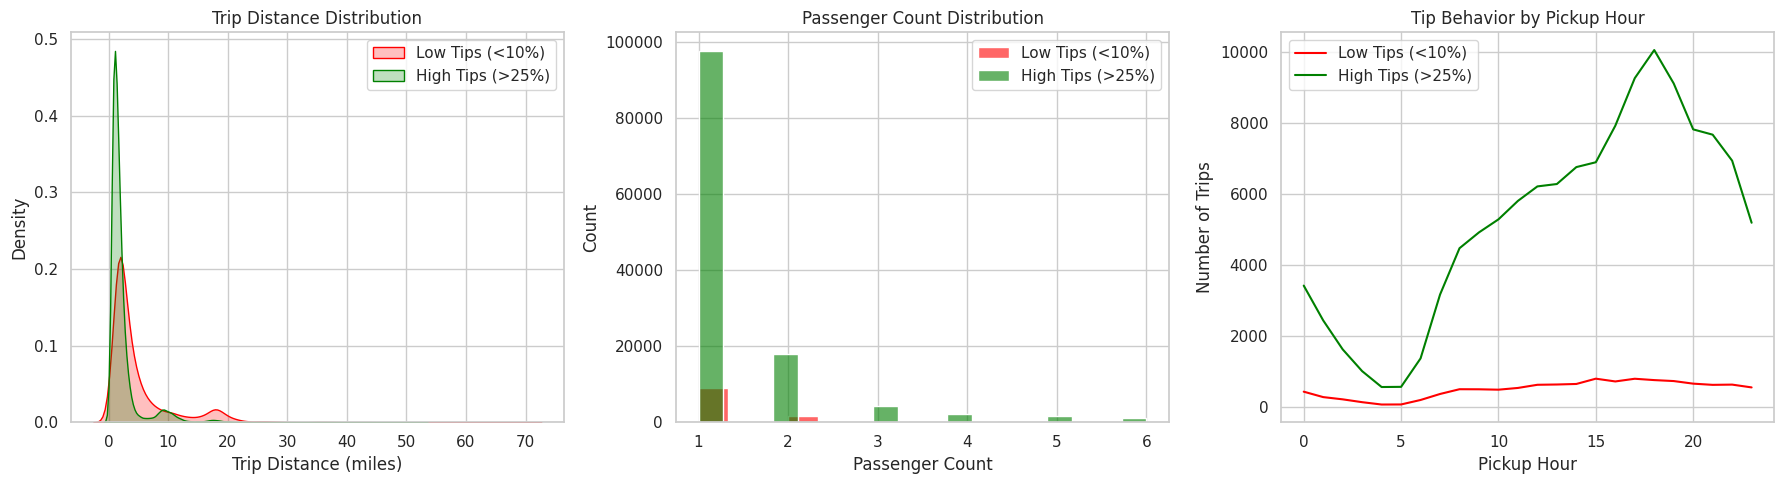

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
t_df = pd.read_csv("merged_trip_data.csv")
# Calculate Tip Percentage
t_df['tip_percentage'] = (t_df['tip_amount'] / t_df['fare_amount']) * 100

# Define tip categories
low_tip_trips = t_df[t_df['tip_percentage'] < 10]
high_tip_trips = t_df[t_df['tip_percentage'] > 25]

# Create subplots for visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Compare trip distances for low vs high tip trips
sns.kdeplot(low_tip_trips['trip_distance'], label="Low Tips (<10%)", fill=True, color="red", ax=axes[0])
sns.kdeplot(high_tip_trips['trip_distance'], label="High Tips (>25%)", fill=True, color="green", ax=axes[0])
axes[0].set_title("Trip Distance Distribution")
axes[0].set_xlabel("Trip Distance (miles)")
axes[0].legend()

# Compare passenger count for low vs high tip trips
sns.histplot(low_tip_trips['passenger_count'], label="Low Tips (<10%)", color="red", alpha=0.6, ax=axes[1])
sns.histplot(high_tip_trips['passenger_count'], label="High Tips (>25%)", color="green", alpha=0.6, ax=axes[1])
axes[1].set_title("Passenger Count Distribution")
axes[1].set_xlabel("Passenger Count")
axes[1].legend()

# Compare pickup hour for low vs high tip trips
sns.lineplot(data=low_tip_trips.groupby("pickup_hour")['tip_percentage'].count(), label="Low Tips (<10%)", color="red", ax=axes[2])
sns.lineplot(data=high_tip_trips.groupby("pickup_hour")['tip_percentage'].count(), label="High Tips (>25%)", color="green", ax=axes[2])
axes[2].set_title("Tip Behavior by Pickup Hour")
axes[2].set_xlabel("Pickup Hour")
axes[2].set_ylabel("Number of Trips")
axes[2].legend()

# Show the plot
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

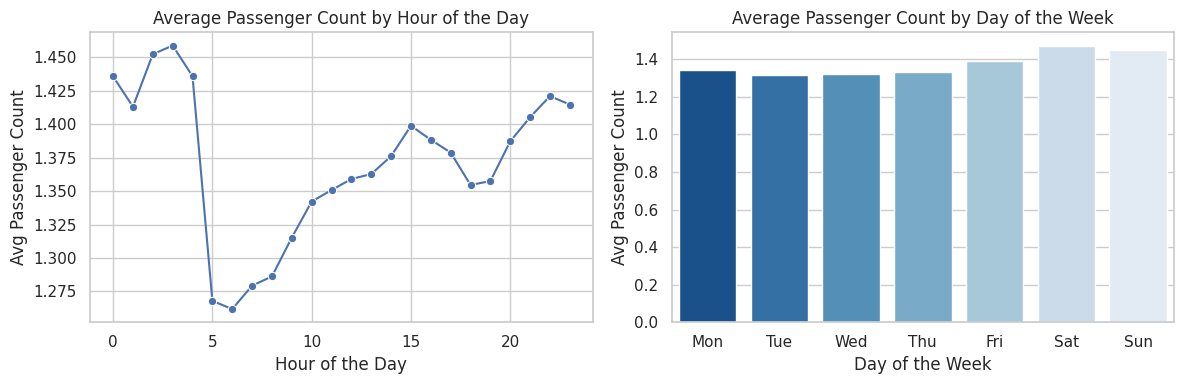

In [ ]:
# See how passenger count varies across hours and days
p_df = pd.read_csv("merged_trip_data.csv")
p_df['tpep_pickup_datetime'] = pd.to_datetime(p_df['tpep_pickup_datetime'])

# Extract hour and day of the week
p_df['pickup_hour'] = p_df['tpep_pickup_datetime'].dt.hour
p_df['pickup_day'] = p_df['tpep_pickup_datetime'].dt.dayofweek  # Monday = 0, Sunday = 6
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
p_df['pickup_day'] = p_df['pickup_day'].map(day_map)

# Group by hour and calculate average passenger count
hourly_passenger_count = p_df.groupby("pickup_hour")["passenger_count"].mean()

# Group by day of the week and calculate average passenger count
daily_passenger_count = p_df.groupby("pickup_day")["passenger_count"].mean().reindex(
    ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot Passenger Count by Hour
sns.lineplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, marker="o", ax=axes[0])
axes[0].set_title("Average Passenger Count by Hour of the Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Avg Passenger Count")

# Plot Passenger Count by Day
sns.barplot(x=daily_passenger_count.index, y=daily_passenger_count.values, palette="Blues_r", ax=axes[1])
axes[1].set_title("Average Passenger Count by Day of the Week")
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Avg Passenger Count")

# Display the plots
plt.tight_layout()
plt.show()


Passenger Count by Hour of the Day (Left Plot)
The highest average passenger count is seen around midnight to early morning (0-2 AM). This could be due to late-night travel from bars, restaurants, or night shifts.
A sharp drop between 4-6 AM suggests lower travel demand during these early hours.
Passenger count gradually increases from morning (6 AM) till the evening (6 PM - 9 PM), which aligns with work commutes and evening outings.

Passenger Count by Day of the Week (Right Plot)
Saturdays and Fridays have the highest average passenger count, suggesting higher travel activity during weekends.
Monday to Thursday have relatively similar lower values, indicating work-week travel patterns.
Sundays show a slight drop from Saturday, but still higher than weekdays, possibly due to leisure activities.

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

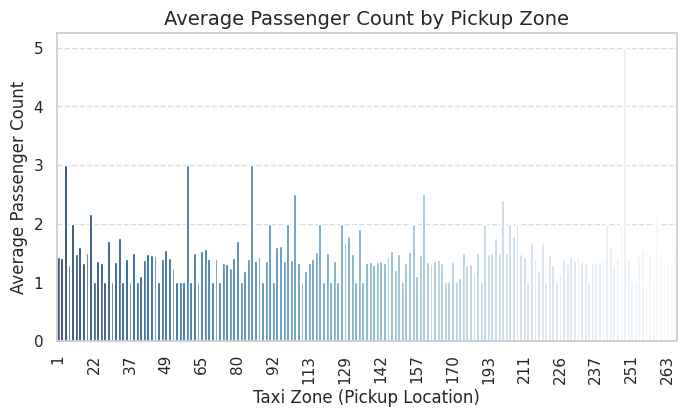

In [ ]:
# How does passenger count vary across zones
r_df = pd.read_csv("merged_trip_data.csv")

# Check if 'passenger_count' and 'PULocationID' exist
if 'passenger_count' not in r_df.columns or 'PULocationID' not in r_df.columns:
    raise KeyError("Missing required columns: 'passenger_count' or 'PULocationID' in the dataset.")

# Group by Pickup Location ID (Taxi Zone) and compute the average passenger count
zone_passenger_counts = r_df.groupby("PULocationID")["passenger_count"].mean().reset_index()

# Rename columns for clarity
zone_passenger_counts.columns = ["Taxi Zone", "Average Passenger Count"]

# Sort zones by average passenger count
zone_passenger_counts = zone_passenger_counts.sort_values(by="Average Passenger Count", ascending=False)

# Visualization using a bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x=zone_passenger_counts["Taxi Zone"], y=zone_passenger_counts["Average Passenger Count"], palette="Blues_r")

plt.xlabel("Taxi Zone (Pickup Location)", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.title("Average Passenger Count by Pickup Zone", fontsize=14)
plt.xticks(rotation=90)
plt.xticks(ticks=plt.xticks()[0][::10])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Variation Across Zones:

Some taxi zones see significantly higher average passenger counts, while others have much lower values.
A few zones exhibit spikes, possibly indicating high-demand locations such as airports, transit hubs, or popular business districts.

Majority of Trips Have Low Passenger Counts:
The overall trend suggests that most taxi trips involve 1 to 2 passengers on average, which is expected for typical NYC taxi rides.

High-Passenger Zones:
Zones with significantly higher bars may correspond to locations like JFK, LaGuardia, Penn Station, Grand Central, or major tourist attractions where group rides are more common.

Low-Passenger Zones:
Zones with low bars could be residential neighborhoods or less busy commercial areas where shared rides or group travel is less frequent.

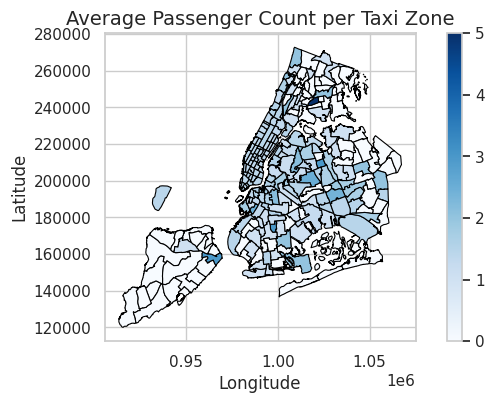

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Load the NYC taxi zones shapefile (assuming it's already in a GeoDataFrame)
zone_gdf = gpd.read_file("/content/drive/MyDrive/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp")

# Load the trip data (assuming it's in a CSV)
trip1_data = pd.read_csv("merged_trip_data.csv")

# Ensure LocationID is properly formatted
trip1_data["PULocationID"] = trip1_data["PULocationID"].astype(int)  # Pickup zone
zone_gdf["LocationID"] = zone_gdf["LocationID"].astype(int)

# Compute the average passenger count per pickup zone
avg_passenger_per_zone = trip1_data.groupby("PULocationID")["passenger_count"].mean().reset_index()
avg_passenger_per_zone.rename(columns={"PULocationID": "LocationID", "passenger_count": "Avg_Passenger_Count"}, inplace=True)

# Merge with the taxi zones GeoDataFrame
zones_with_trips = zone_gdf.merge(avg_passenger_per_zone, on="LocationID", how="left")

# Fill NaN values with 0 (zones with no trips recorded)
zones_with_trips["Avg_Passenger_Count"] = zones_with_trips["Avg_Passenger_Count"].fillna(0)

# Plot the map using a choropleth representation
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
zones_with_trips.plot(column="Avg_Passenger_Count", cmap="Blues", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

# Title and labels
ax.set_title("Average Passenger Count per Taxi Zone", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.show()


In [ ]:
print(zones_with_trips[["LocationID", "Avg_Passenger_Count"]].head())

   LocationID  Avg_Passenger_Count
0           1             1.437500
1           2             0.000000
2           3             0.000000
3           4             1.412037
4           5             0.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

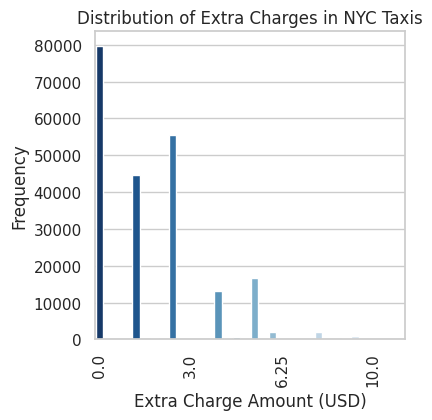

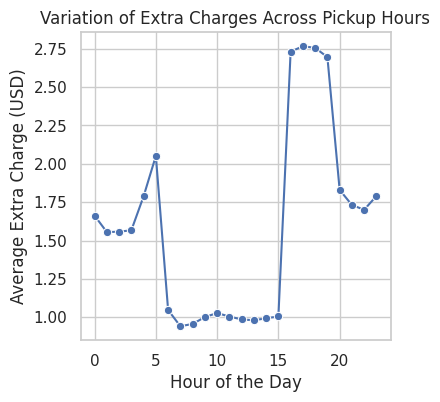

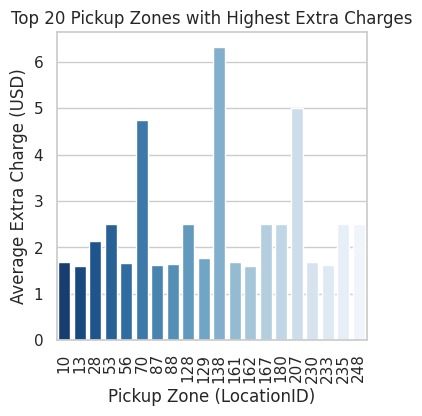

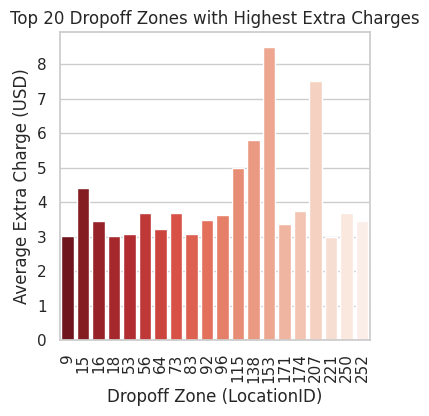

In [ ]:
# How often is each surcharge applied?
trip2_data = pd.read_csv("merged_trip_data.csv")

# Checking surcharge distribution
surcharge_counts = trip2_data["extra"].value_counts()

# Plotting frequency of surcharge application
plt.figure(figsize=(4, 4))
sns.barplot(x=surcharge_counts.index, y=surcharge_counts.values, palette="Blues_r")
plt.xlabel("Extra Charge Amount (USD)")
plt.xticks(rotation=90)
plt.xticks(ticks=plt.xticks()[0][::10])
plt.ylabel("Frequency")
plt.title("Distribution of Extra Charges in NYC Taxis")
plt.show()

# Analyze surcharges across different pickup hours
trip2_data["pickup_hour"] = pd.to_datetime(trip2_data["tpep_pickup_datetime"]).dt.hour
surcharge_by_hour = trip2_data.groupby("pickup_hour")["extra"].mean()

# Plot surcharge by hour
plt.figure(figsize=(4, 4))
sns.lineplot(x=surcharge_by_hour.index, y=surcharge_by_hour.values, marker="o", color="b")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charge (USD)")
plt.title("Variation of Extra Charges Across Pickup Hours")
plt.grid(True)
plt.show()

# Analyze surcharges across different pickup zones
surcharge_by_zone = trip2_data.groupby("PULocationID")["extra"].mean().sort_values(ascending=False)

# Plot surcharge by pickup zone
plt.figure(figsize=(4, 4))
sns.barplot(x=surcharge_by_zone.index[:20], y=surcharge_by_zone.values[:20], palette="Blues_r")
plt.xticks(rotation=90)
plt.xlabel("Pickup Zone (LocationID)")
plt.ylabel("Average Extra Charge (USD)")
plt.title("Top 20 Pickup Zones with Highest Extra Charges")
plt.show()

# Analyze surcharges across dropoff zones
surcharge_by_zone_dropoff = trip2_data.groupby("DOLocationID")["extra"].mean().sort_values(ascending=False)

# Plot surcharge by dropoff zone
plt.figure(figsize=(4, 4))
sns.barplot(x=surcharge_by_zone_dropoff.index[:20], y=surcharge_by_zone_dropoff.values[:20], palette="Reds_r")
plt.xticks(rotation=90)
plt.xlabel("Dropoff Zone (LocationID)")
plt.ylabel("Average Extra Charge (USD)")
plt.title("Top 20 Dropoff Zones with Highest Extra Charges")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1. Demand-Based Routing and Dispatching
Increase taxi supply during high-demand hours (Midnight - 3 AM & 5-8 PM).
Reduce taxi availability between 5-6 AM, when demand is lowest, to optimize fleet usage.
Focus on key zones (Airports, Manhattan, Business Districts) for dispatch priority.

2. Fare Optimization and Promotions
Encourage tipping with promotions during low-tip hours (midday) or short-distance rides (e.g., driver incentives for service quality).
Introduce discounts or incentives for short trips to make them more appealing to drivers and improve overall tipping culture.

3. Operational Efficiency in Pickup and Dropoff Locations
Reduce wait times by optimizing pickup locations where extra charges occur frequently.
Ensure sufficient taxis are available in Airport zones during peak hours to handle high surcharge periods.

4. Enhanced Customer Experience
Train drivers on service quality to increase tipping behavior, especially during night and peak hours.
Utilize data insights to adjust driver schedules for better alignment with demand patterns.



**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Time-Based Cab Positioning
Late Night / Early Morning (12 AM - 5 AM)

Demand Insights:
High demand in nightlife hubs (bars, clubs, and entertainment areas) from 12 AM - 3 AM.
Lowest demand around 4-6 AM, except for early airport travelers.
Recommended Cab Positioning:
Concentrate cabs around:
Times Square, Meatpacking District, East Village, Lower Manhattan (Nightlife Hubs).
Airports (JFK, LaGuardia) and Midtown hotels for early-morning flight travelers.
Reduce cabs in:
Residential areas (Lower Brooklyn, Queens) where demand drops significantly.
Morning Rush (6 AM - 10 AM)

Demand Insights:
High commuter demand for work travel, especially from residential areas to business hubs.
Recommended Cab Positioning:
Deploy more taxis in:
Brooklyn & Queens (commuters heading to Manhattan).
Near subway stations (as some passengers may switch from subway to taxi).
Business districts (Financial District, Midtown Manhattan) to capture inbound commuters.
Reduce cabs at:
Nightlife districts (demand is minimal in these areas).
Midday (10 AM - 4 PM)

Demand Insights:
Moderate demand from business meetings, tourists, and shopping trips.
Lower tip percentages, indicating a cost-conscious passenger segment.
Recommended Cab Positioning:
Strategically position cabs in:
Shopping areas (SoHo, 5th Avenue).
Hotels and tourist hotspots (Times Square, Central Park, Museums).
Hospitals and government buildings (Medical transport demand).
Reduce cabs in:
Residential zones (low outbound movement).
Evening Rush (4 PM - 8 PM)

Demand Insights:
High commuter movement from business districts to residential areas.
Steady increase in tipping behavior.
Recommended Cab Positioning:
Concentrate cabs in:
Business districts (Midtown, Wall Street) for outbound commuters.
Subway & train stations (Penn Station, Grand Central) to pick up commuters.
Tourist and shopping hubs (demand rises as visitors head back to hotels).
Reduce cabs at:
Airport zones (demand usually dips at this time).
Night (8 PM - 12 AM)
Demand Insights:
High demand in entertainment and dining areas.
Peak surcharge times due to limited availability.
Recommended Cab Positioning:
Prioritize cabs in:
Restaurant districts (West Village, Chelsea).
Broadway theaters (Times Square, Hell’s Kitchen).
Sports venues and event locations (Madison Square Garden, Barclays Center).
Reduce cabs at:
Business hubs (demand declines after work hours).

2. Day-Based Cab Positioning
Weekdays (Monday - Friday)
Morning: Focus on residential-to-business movement.
Evening: Business-to-residential + airport demand increases mid-week.
Best Zones: Midtown, Financial District, Subway Stations, Airports (Wed-Fri).

Weekends (Saturday & Sunday)
Saturday: High shopping and leisure trips → deploy cabs at malls, parks, and nightlife areas.
Sunday: Airport demand increases → more taxis at JFK & LaGuardia.
Best Zones:
Saturday: Shopping districts, tourist spots, nightlife areas.
Sunday: Airports, train stations, brunch areas.

3. Monthly & Seasonal Adjustments

Winter (Dec-Feb):
Airport traffic surges (holidays), so more cabs at JFK, LaGuardia.
Reduced nightlife activity due to cold → shift more taxis to hotels and shopping areas.

Spring/Summer (Mar-Aug):
Tourist hotspots surge → Central Park, Museums, Broadway shows.
Outdoor events increase → deploy cabs around stadiums and concert venues.
Fall (Sep-Nov):

Steady business demand → corporate districts remain key pickup zones.
Evening demand spikes due to after-work outings and early holiday shopping.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

Increase base fares & surge pricing during high-demand hours (Morning & Evening Rush, Nightlife hours).

Offer slight fare reductions during low-demand hours (Midday, Late Night Post-3 AM) to incentivize ridership.

Implement geofencing-based demand pricing in zones with frequent surcharges (e.g., Airports, Midtown).

Increase flat-rate airport fares during peak departure/arrival hours. Implement event-based surge pricing around major venues (dynamic pricing applies 1-2 hours before & after events).

Keep flat fares for short-distance rides to compete with Uber’s upfront pricing. Offer promo fares for frequent riders (e.g., discounts for 5+ rides in a week).

Introduce a "Guaranteed Fare Cap" during peak times to attract budget-conscious riders.

Promote credit card and app-based payments by offering a small discount on cashless transactions.

Implement suggested tip options (15%, 20%, 25%) on payment screens.

Reduce the number of confusing surcharges (combine night & peak-hour charges into one).

Display fare breakdowns upfront on in-taxi screens and apps. Introduce estimated fare ranges for popular routes to increase transparency.
